In [2]:
from eval import evaluate_backbone
from pretrain import FaceRecognitionModel
import os, torch, numpy as np, matplotlib.pyplot as plt

/home/thoal/anaconda3/envs/pytorch/lib/python3.13/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


## IRSE18 + AdaFace + MS1MV2

In [2]:
checkpoint_path = os.path.join('checkpoints', 'ir_se_18_adaface_MS1MV2_Dataset', 'epoch=39-train_loss=3.13364.ckpt')
checkpoint = torch.load(checkpoint_path, map_location = 'cpu')

In [3]:
print(checkpoint.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'MixedPrecision'])


In [ ]:
hparams = {
        "backbone_name": "ir_se_18",
        "pretrained": 0,
        "head_name": "adaface",
        "embedding_dim": 512,
        "num_classes": 76229,  
        "optimizer": "adamw",
        "learning_rate": 1e-3,
        "start_factor": 1e-1,
        "min_lr": 5e-6,
        "weight_decay": 0.05,
        "scheduler": "cosine",
        "max_epochs": 40,
        "warmup_epochs": 5,
        "margin": 0.4,
        "scale": 64,
        "h": 0.333,
        "t_alpha": 1.0,
        "scheduler_milestones": [20, 30], # Default value, not used by cosine scheduler
        "val_datasets": ["LFW_Dataset", "CALFW_Dataset", "CPLFW_Dataset"]
}

In [5]:
model = FaceRecognitionModel(**hparams)


AdaFace with the following property
self.m 0.4
self.h 0.333
self.s 64
self.t_alpha 1.0


In [7]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
backbone = model.backbone

In [10]:
metrics = evaluate_backbone(backbone)

Processing dataset: LFW...
Finished processing LFW.
Processing dataset: CPLFW...
Finished processing CPLFW.
Processing dataset: CALFW...
Finished processing CALFW.
Processing dataset: CFP-FP...
Finished processing CFP-FP.
Processing dataset: CFP-FF...
Finished processing CFP-FF.


LFW dataset got:
	97.70000000 accuracy.
	98.78528139 precision.
	96.60000000 recall.
	97.67193676 f1_score.
CPLFW dataset got:
	89.86666667 accuracy.
	94.71389307 precision.
	84.37738551 recall.
	89.22456172 f1_score.
CALFW dataset got:
	95.40000000 accuracy.
	99.06472731 precision.
	91.65982369 recall.
	95.20507770 f1_score.
CFP-FP dataset got:
	95.07081545 accuracy.
	97.50879396 precision.
	92.51273025 recall.
	94.92906368 f1_score.
CFP-FF dataset got:
	99.81416309 accuracy.
	99.85672976 precision.
	99.77110111 recall.
	99.81373167 f1_score.


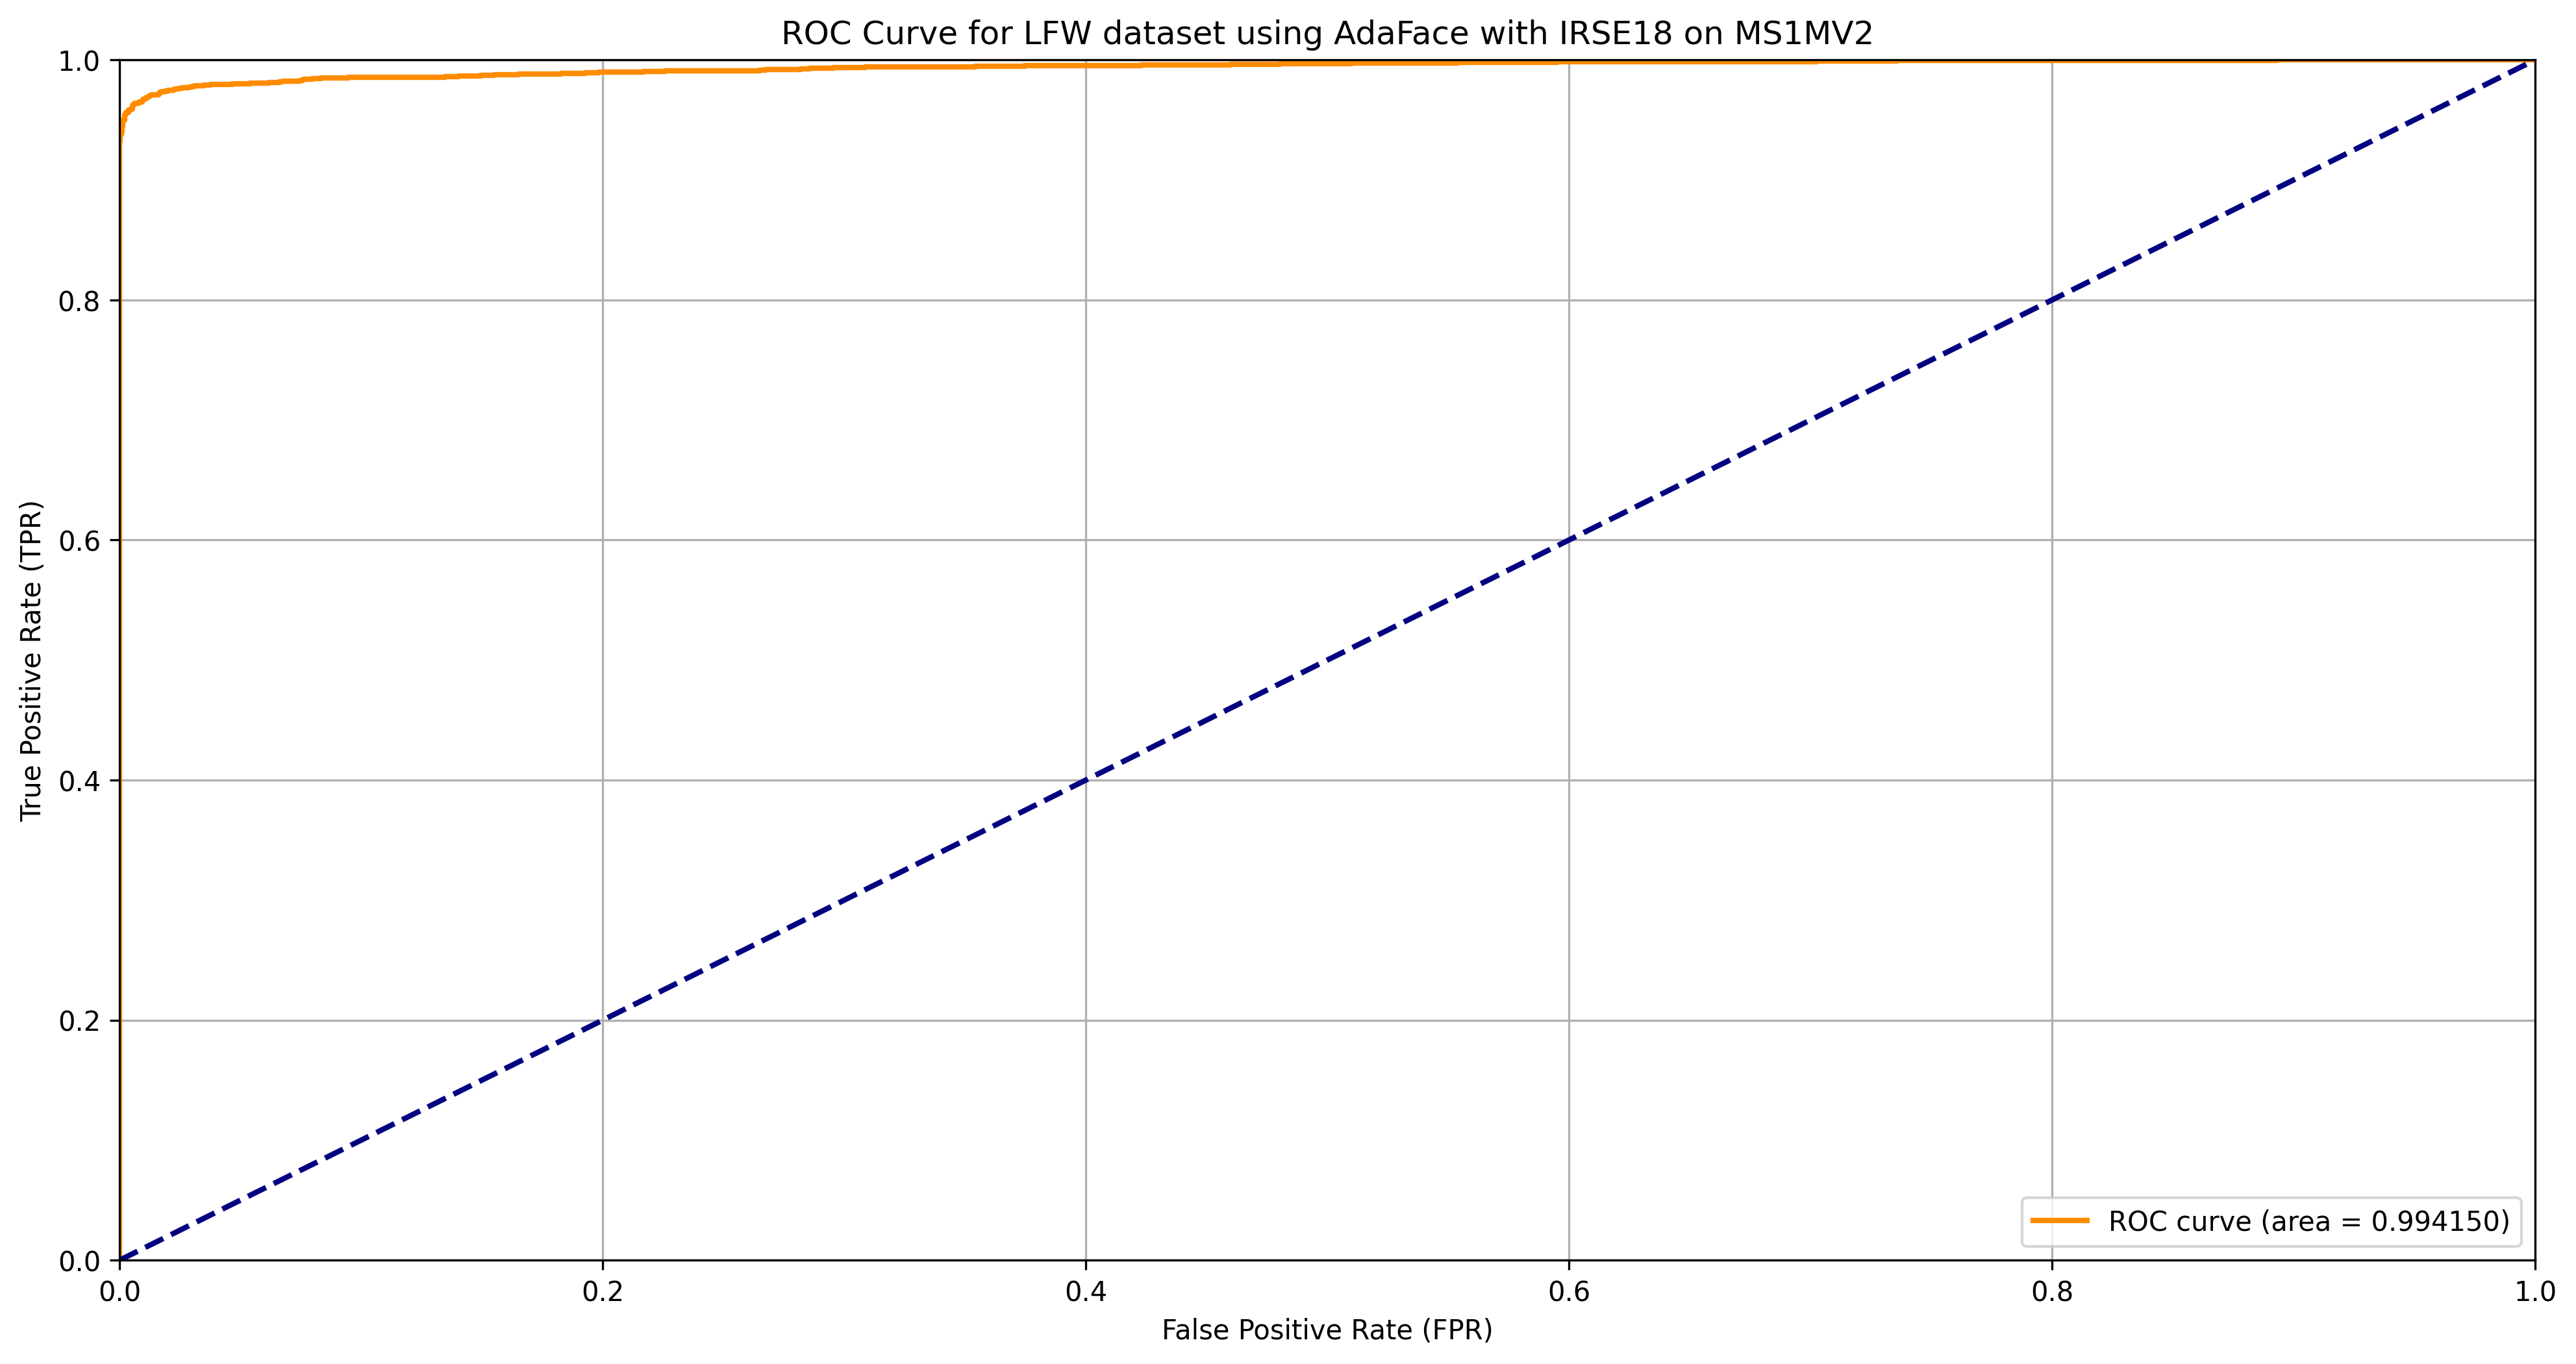

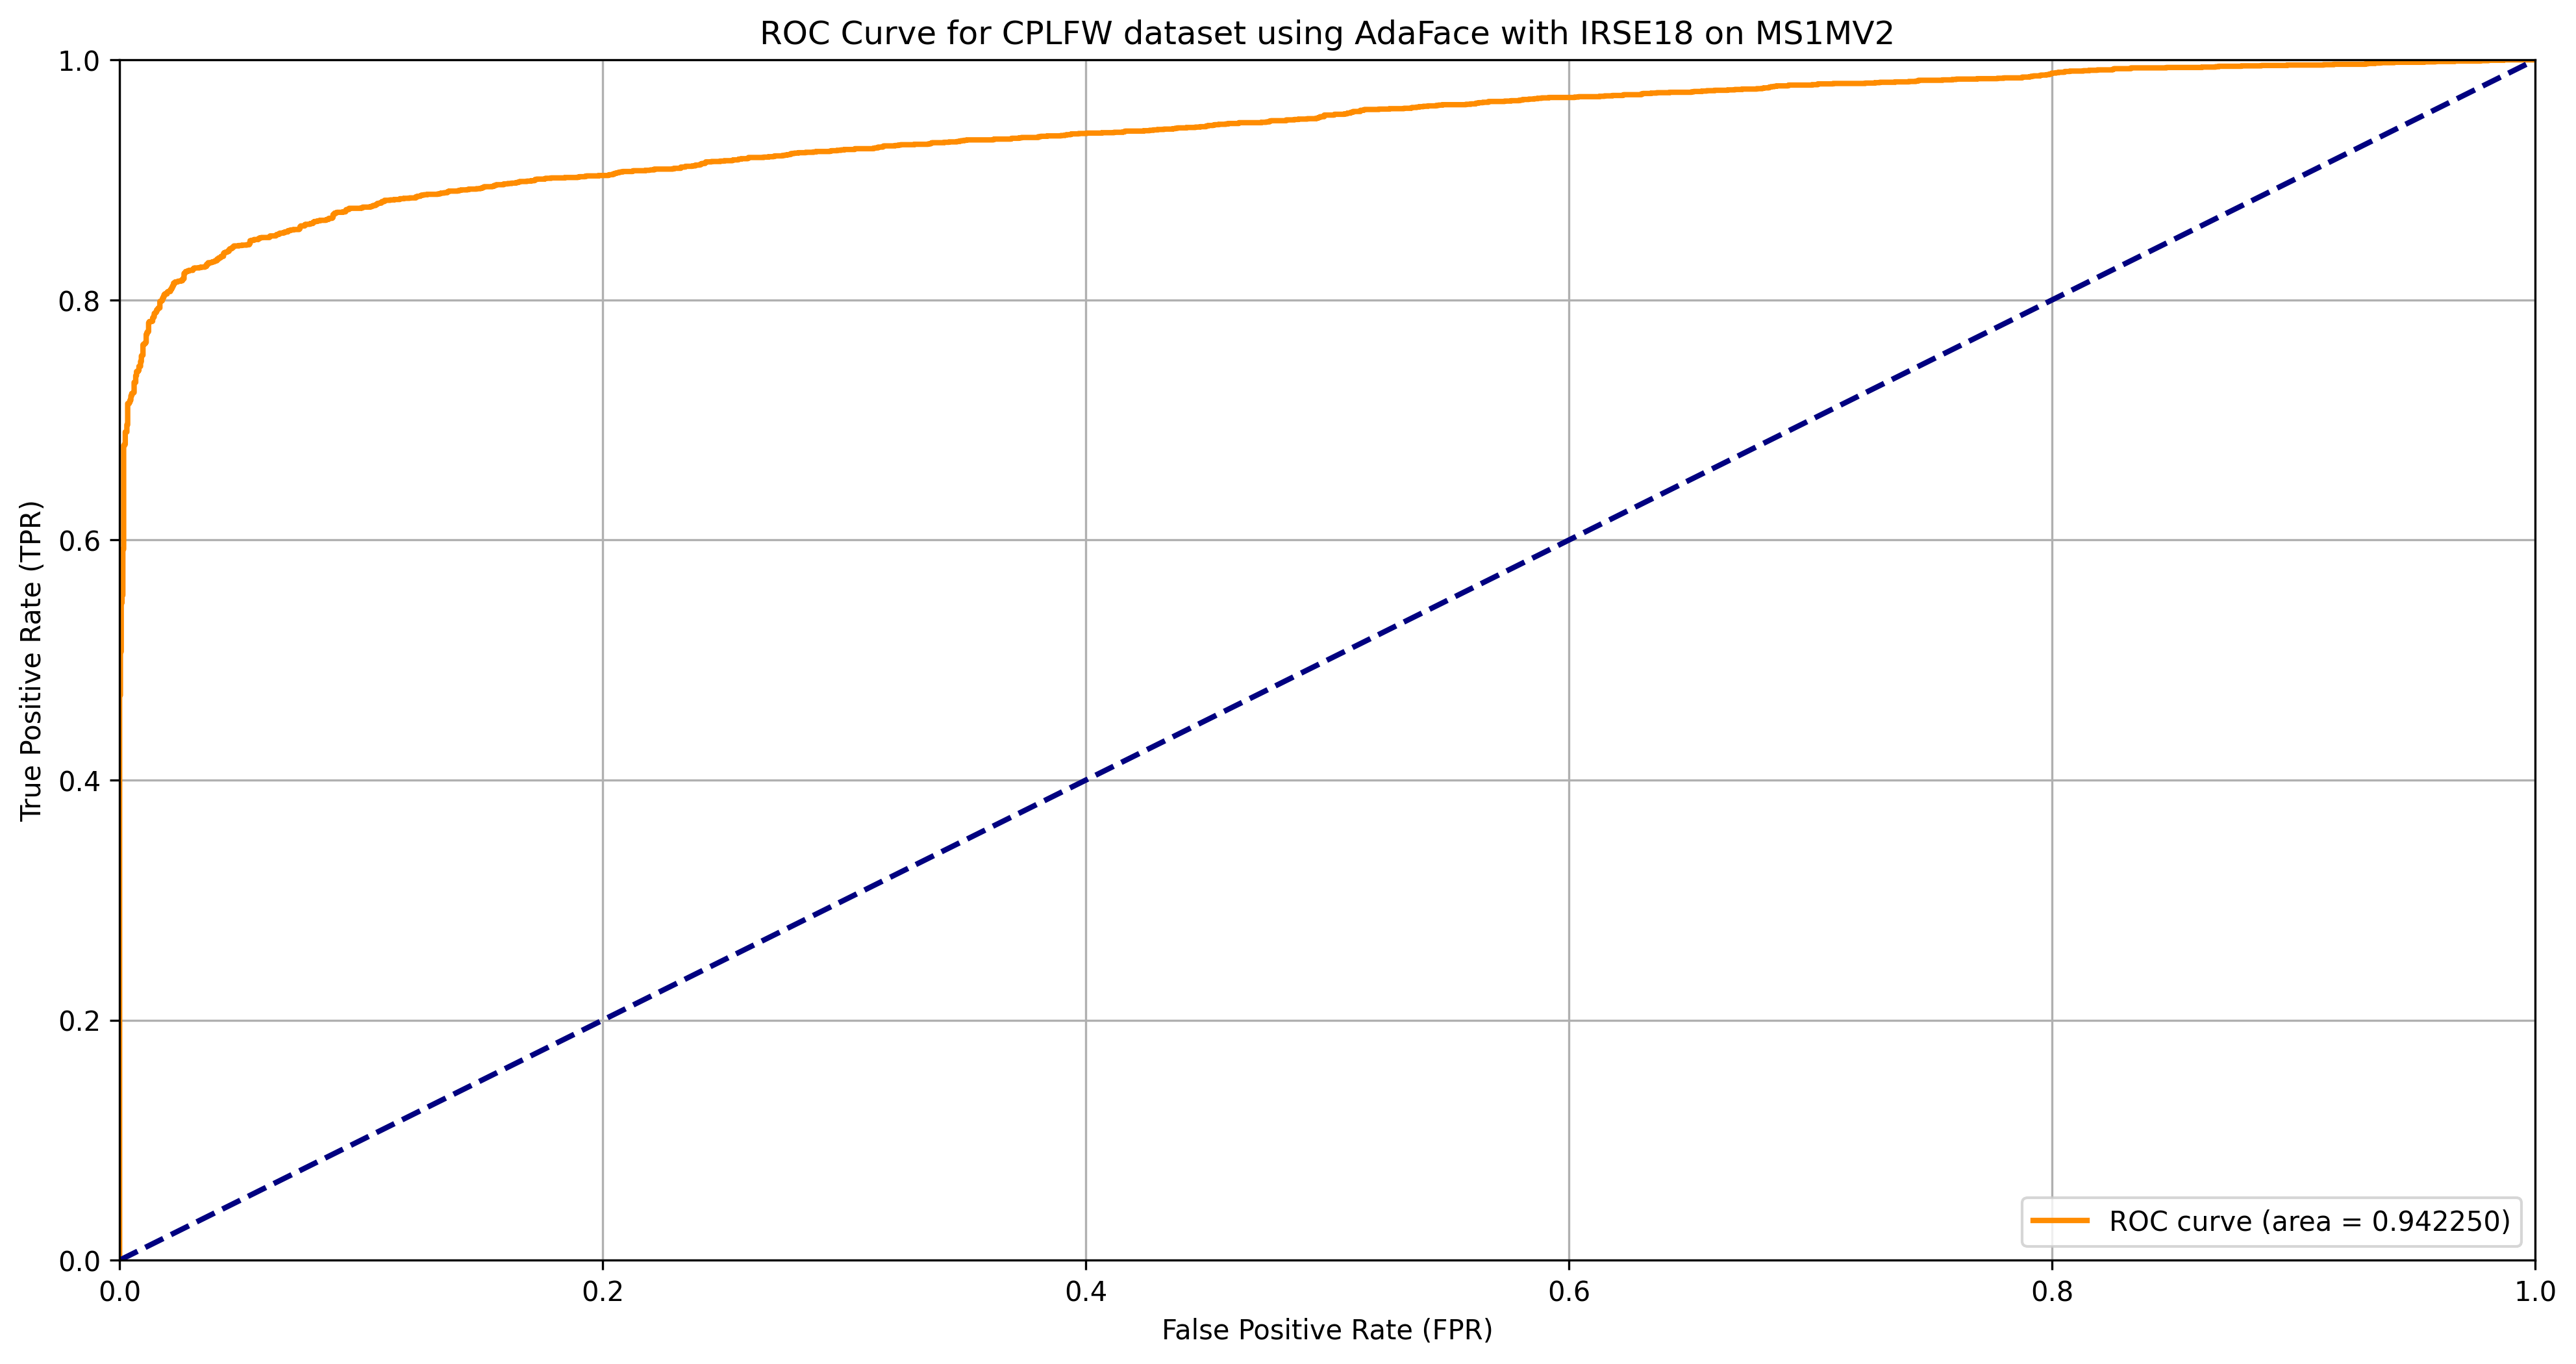

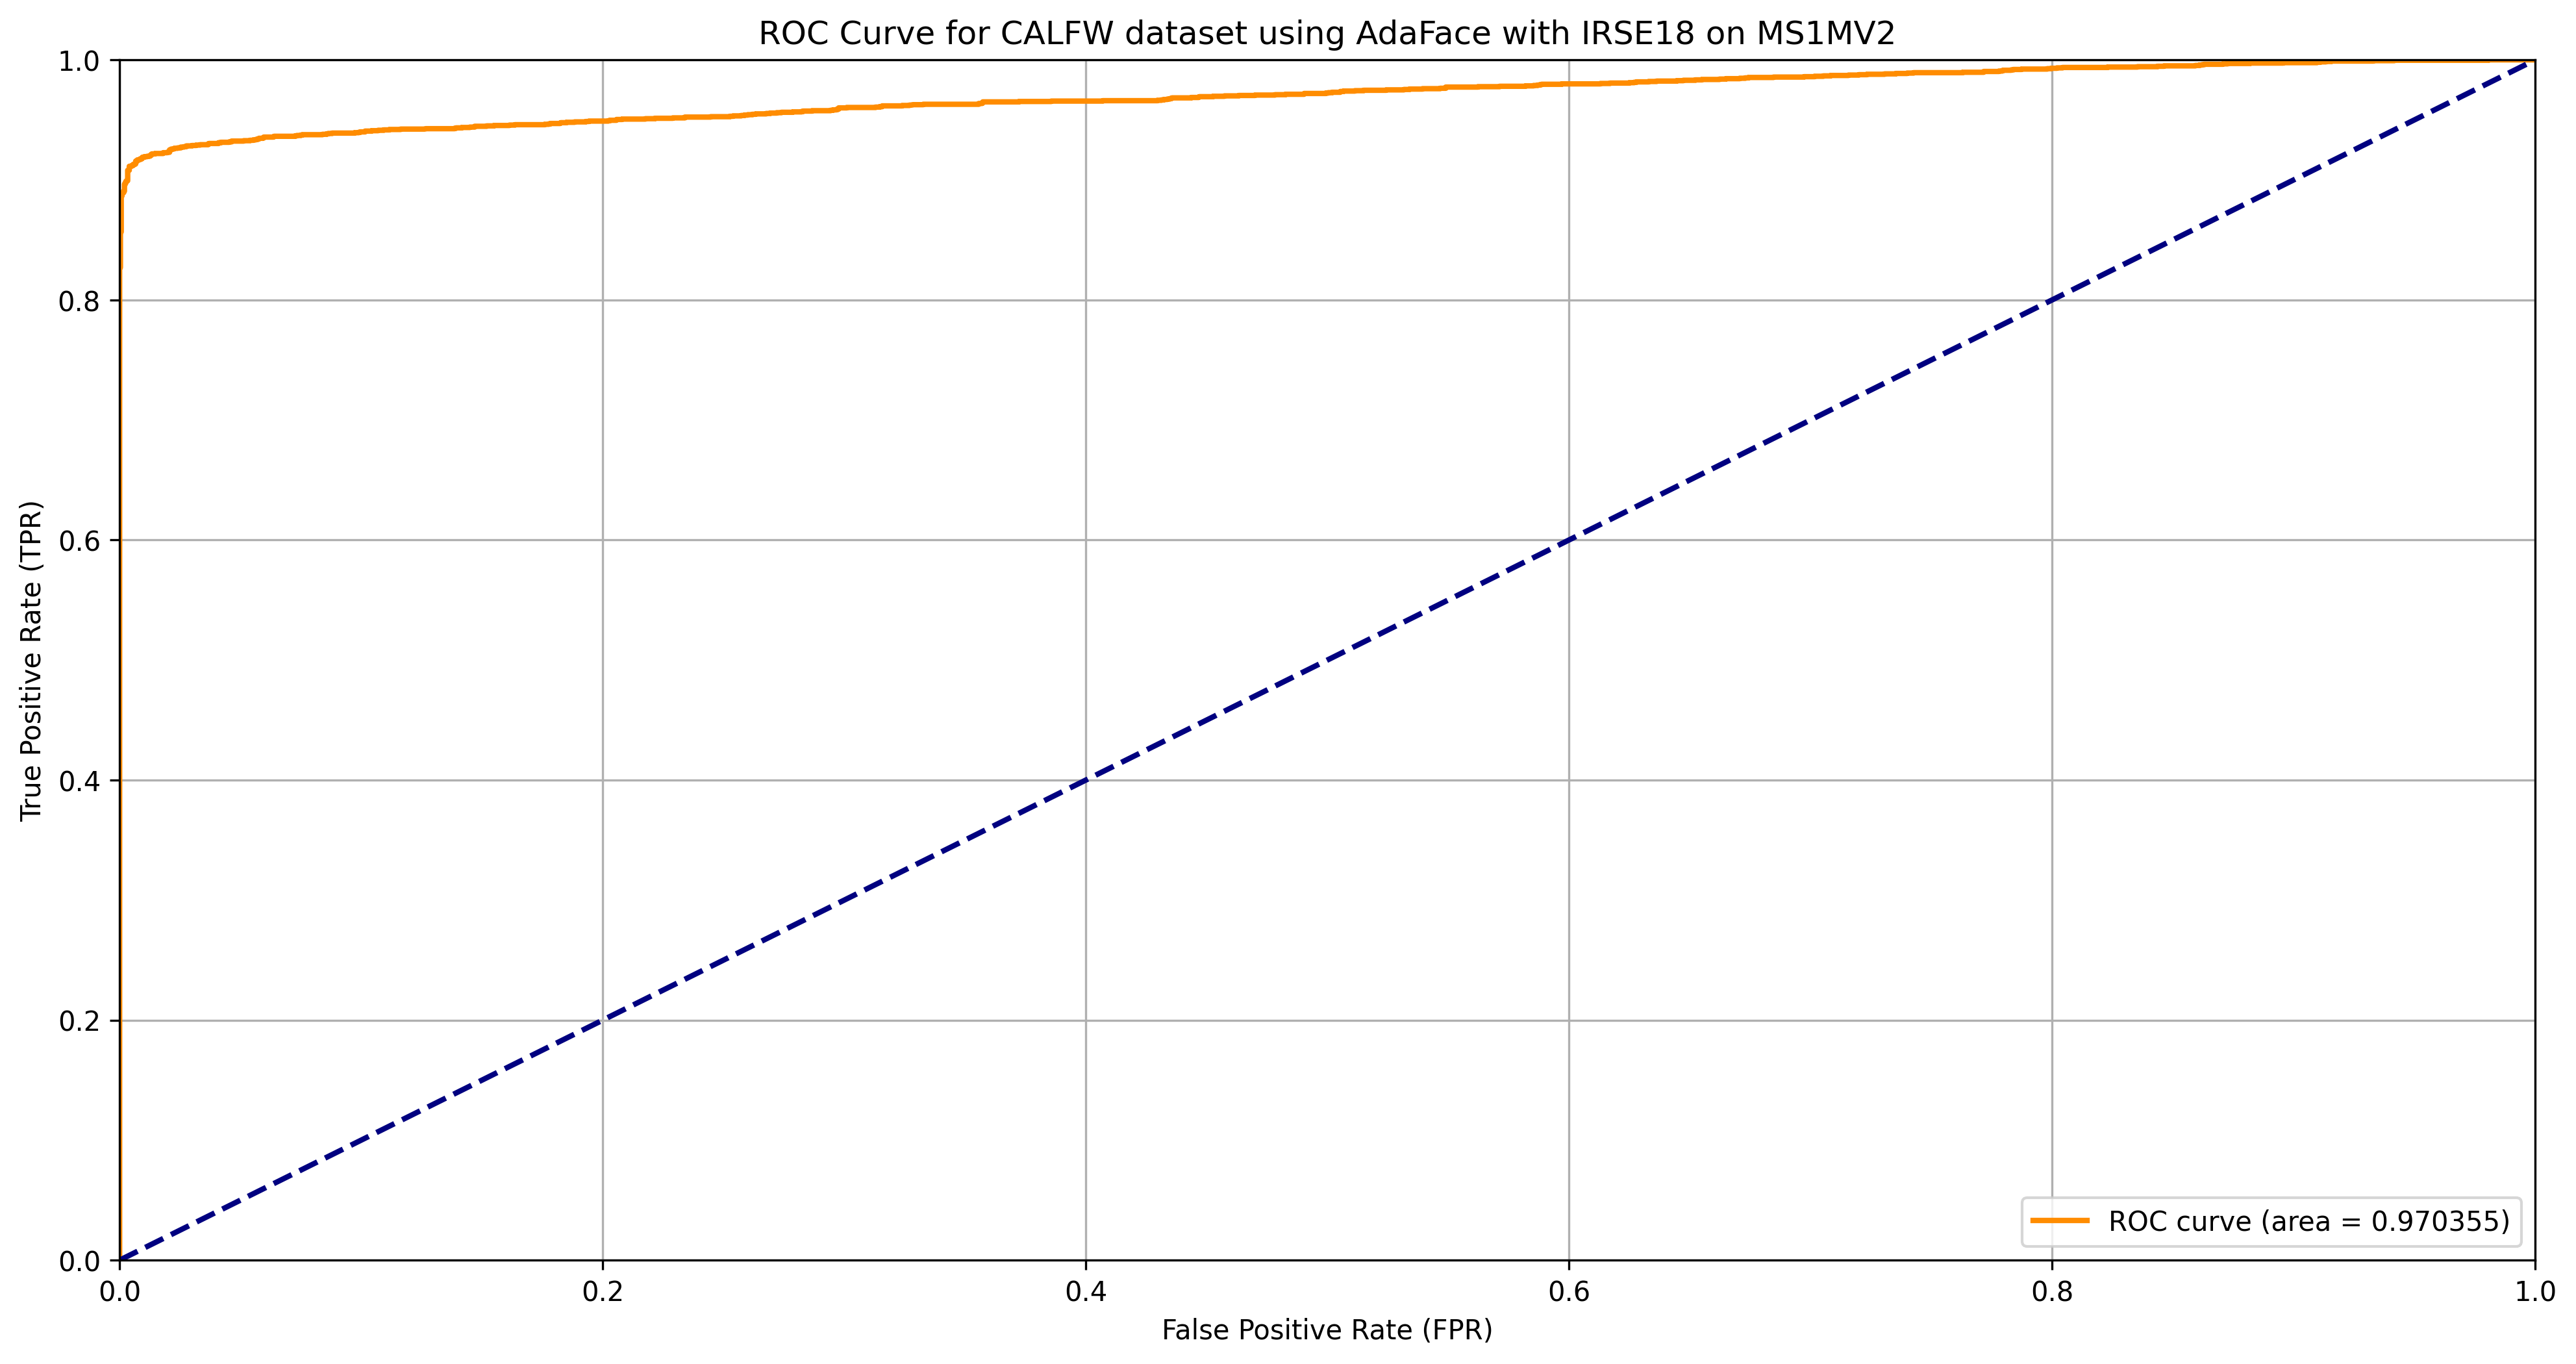

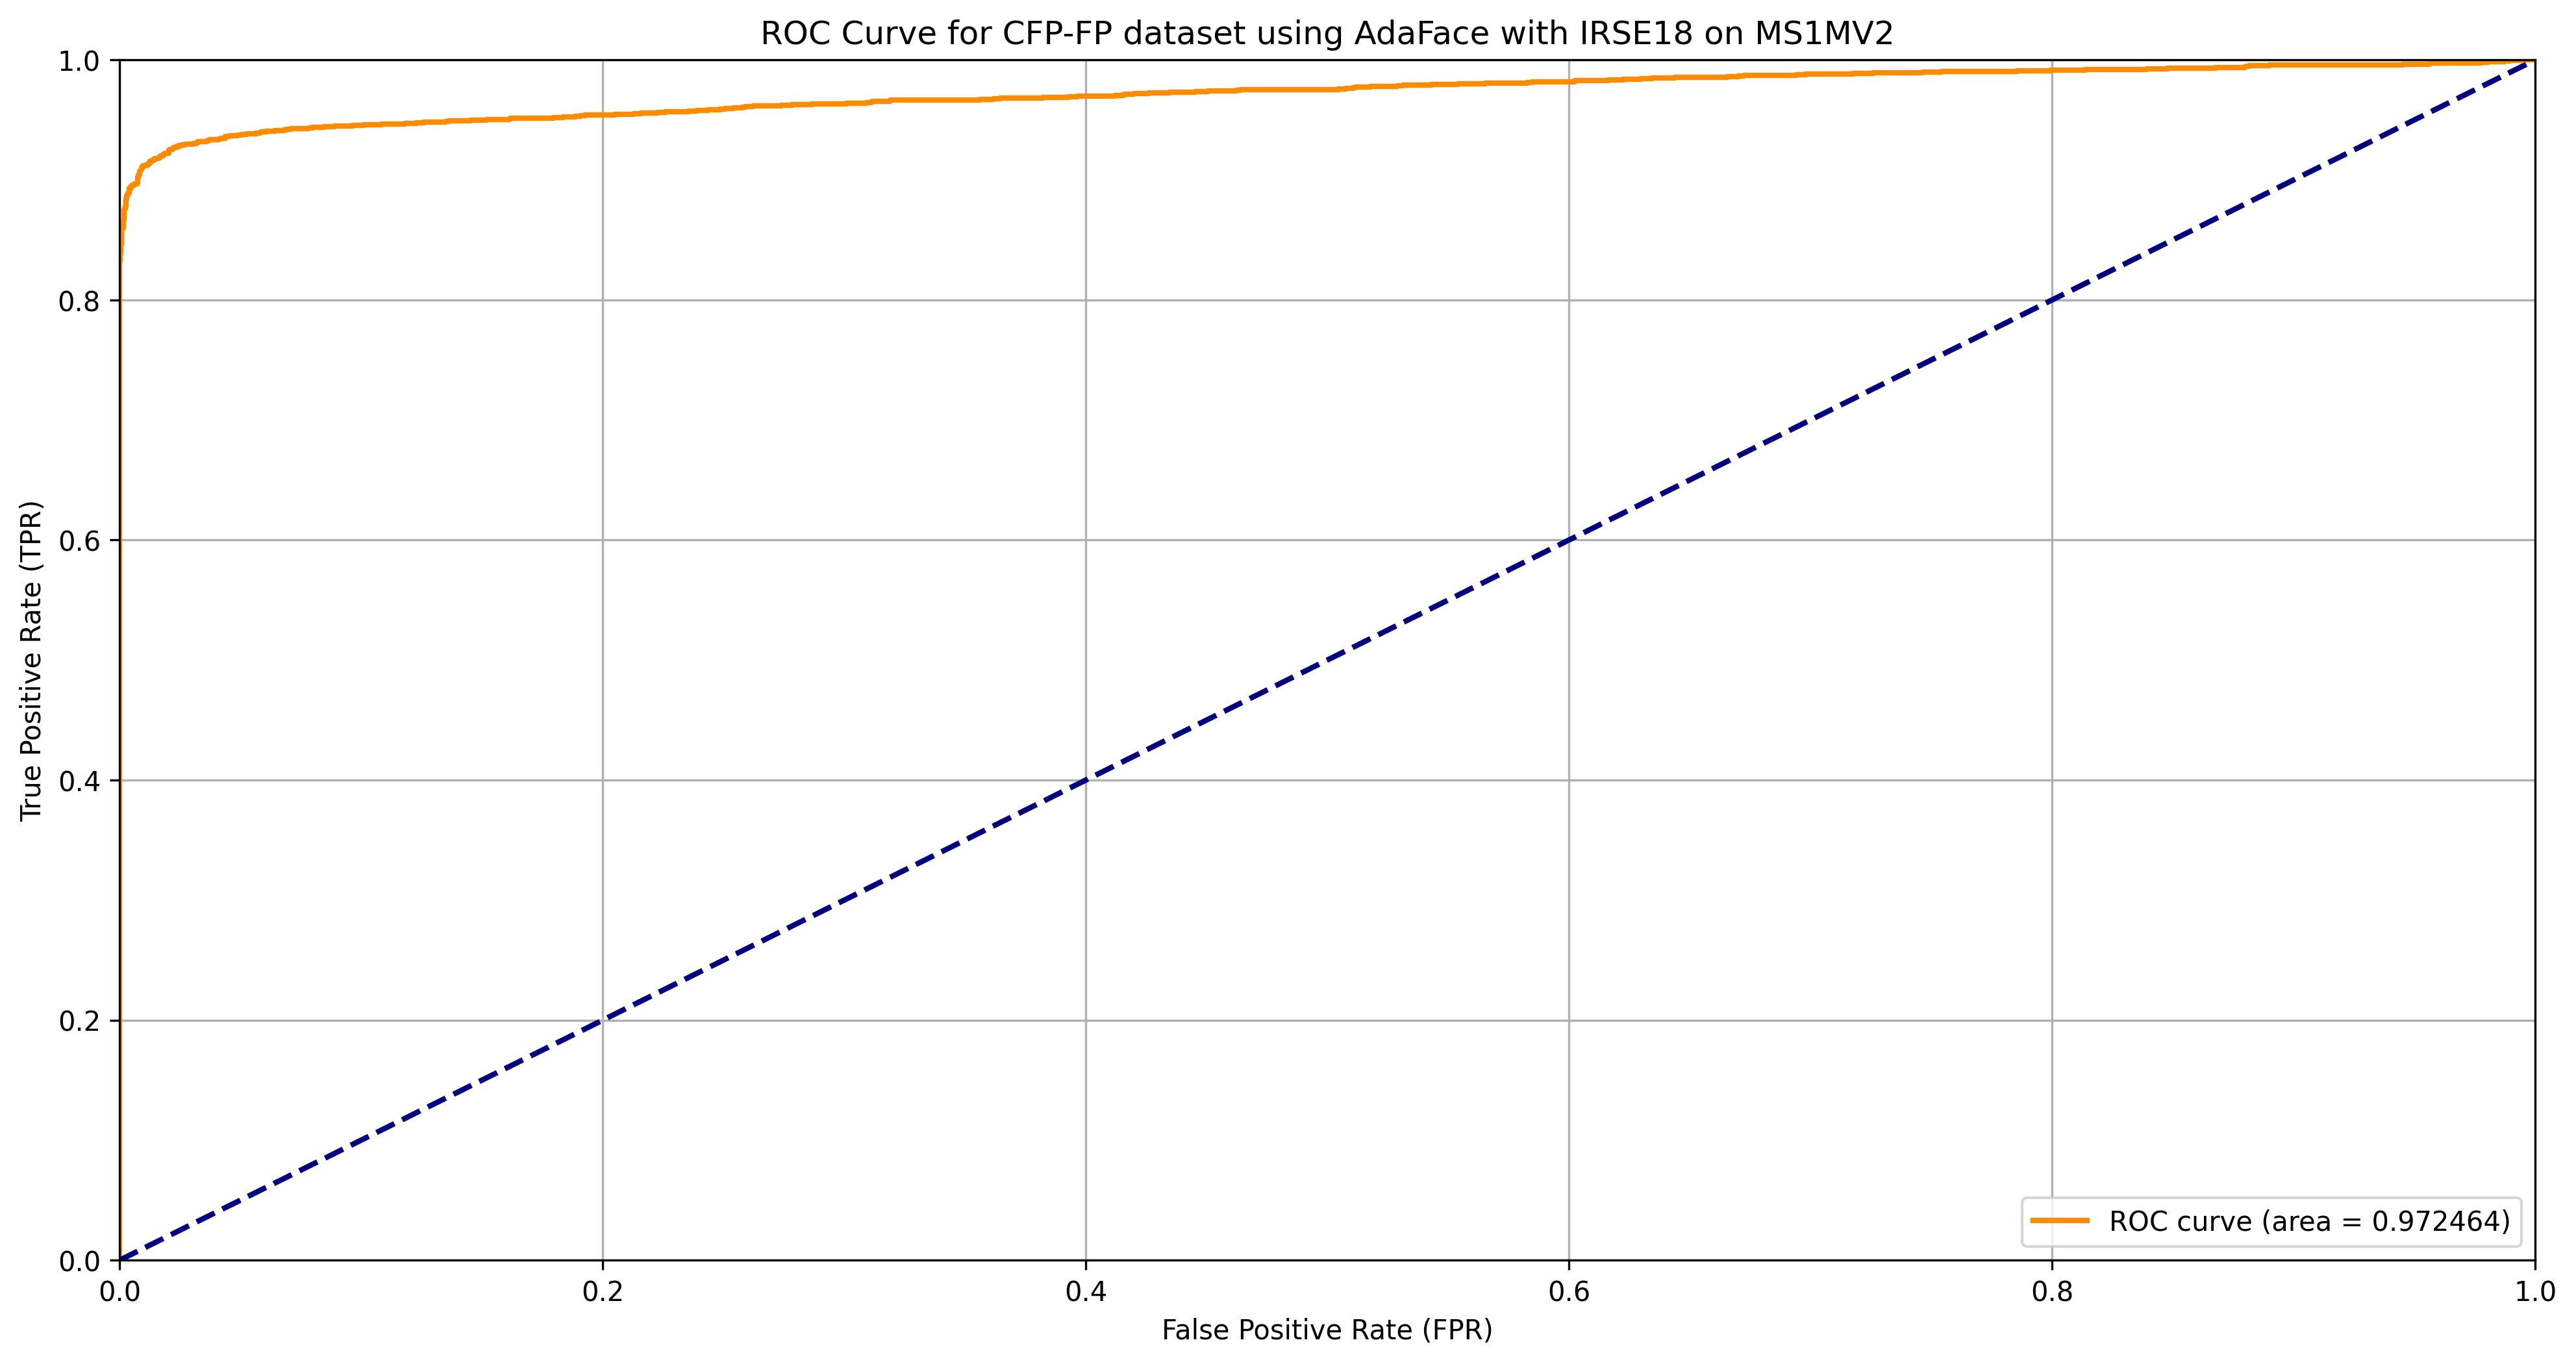

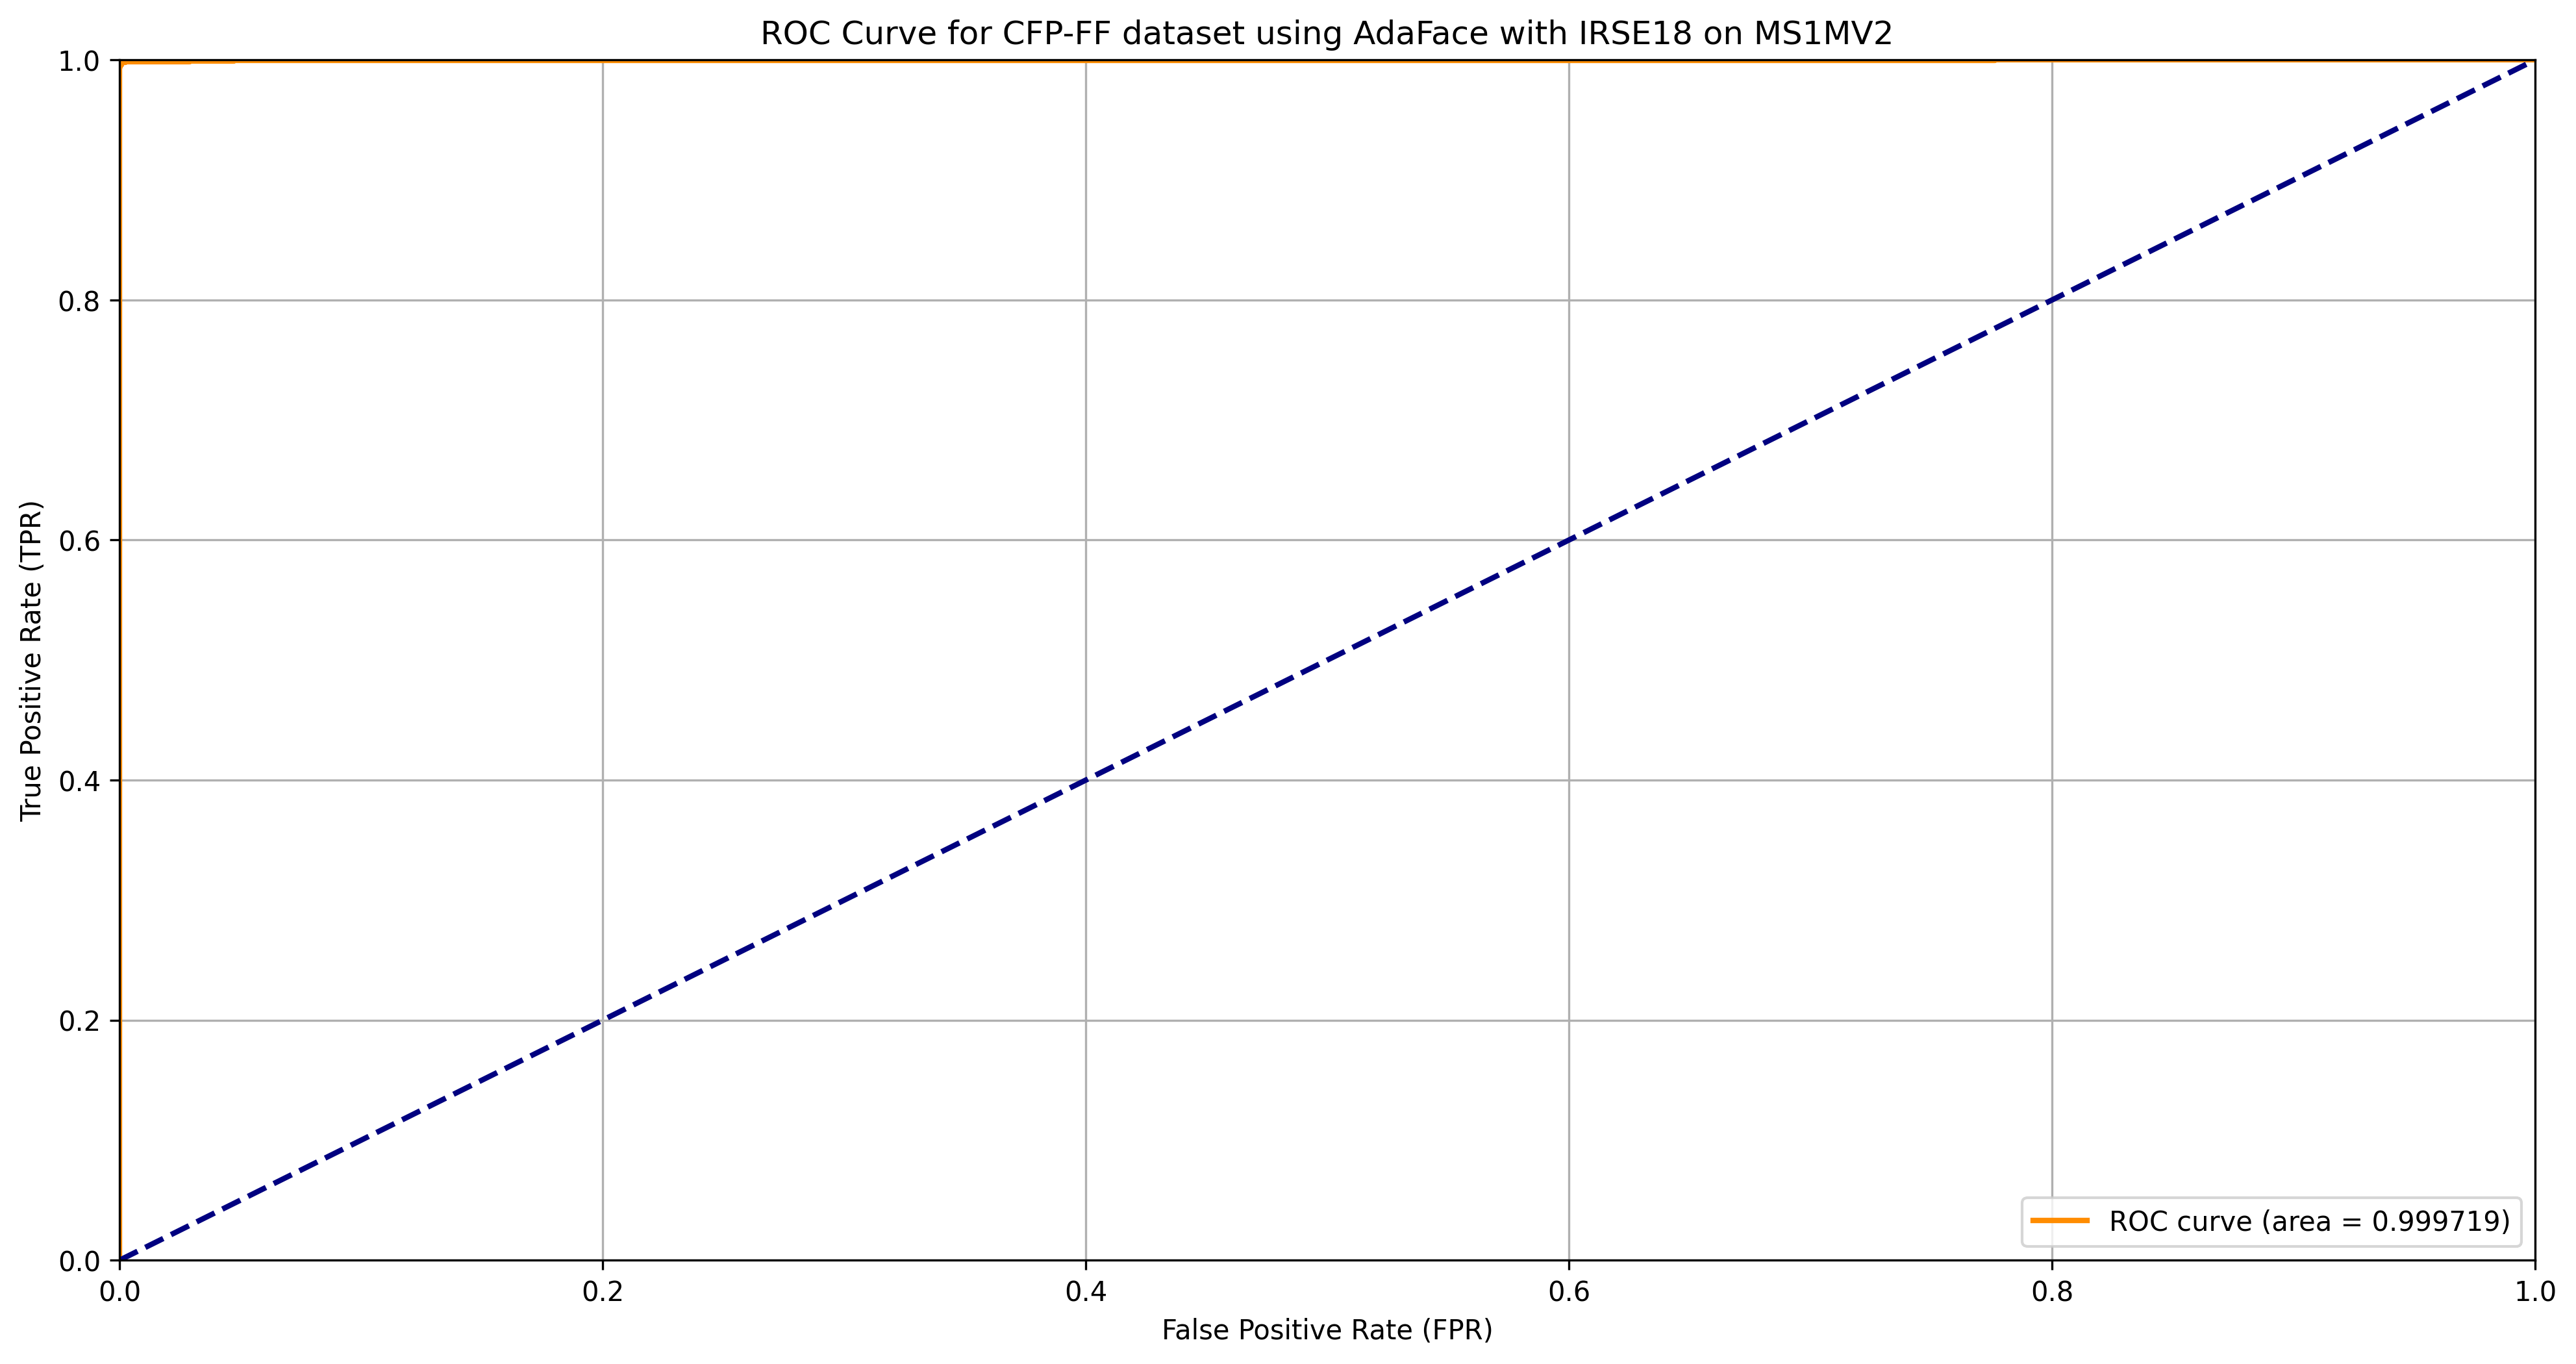

In [ ]:
output_dir = os.path.join('data', 'results', 'AdaFace using MS1MV2 and IRSE18')
for key in metrics.keys():
    accuracy, precision, recall, f1_score, auc, fpr, tpr, thresholds = metrics[key]

    print(f'{key} dataset got:')
    print(f'\t{100 * accuracy:.8f} accuracy.')
    print(f'\t{100 * precision:.8f} precision.')
    print(f'\t{100 * recall:.8f} recall.')
    print(f'\t{100 * f1_score:.8f} f1_score.')

    roc_title = f'ROC Curve for {key} dataset using AdaFace with IRSE18 on MS1MV2'
    with open(os.path.join(output_dir, 'metrics.txt'), 'a') as f:
        f.writelines(f"""
          {key} dataset got:
          \t{100 * accuracy:.8f} accuracy.
          \t{100 * precision:.8f} precision.
          \t{100 * recall:.8f} recall.
          \t{100 * f1_score:.8f} f1_score.
    """)
    plt.figure(figsize = (8, 6), dpi = 300)
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {auc:.6f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(roc_title)
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{roc_title}.png'))


### Save the backbone

In [3]:
path = os.path.join('data', 'models', 'AdaFace with IRSE18 on MS1MV2', 'model.pth')

In [ ]:
torch.save(backbone.state_dict(), path)

# SwinV2T + AdaFace + MS1MV2

In [2]:
checkpoint_path = os.path.join('checkpoints', 'swin_v2_t_adaface_MS1MV2_Dataset', 'epoch=39-train_loss=3.49745.ckpt')
checkpoint = torch.load(checkpoint_path, map_location = 'cpu')

In [3]:
print(checkpoint.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'MixedPrecision', 'hparams_name', 'hyper_parameters'])


In [4]:
model = FaceRecognitionModel(**checkpoint['hyper_parameters'])

/home/thoal/anaconda3/envs/pytorch/lib/python3.13/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



AdaFace with the following property
self.m 0.4
self.h 0.333
self.s 64.0
self.t_alpha 0.99


In [5]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [6]:
backbone = model.backbone

In [7]:
metrics = evaluate_backbone(backbone)

Processing dataset: LFW...
Finished processing LFW.
Processing dataset: CPLFW...
Finished processing CPLFW.
Processing dataset: CALFW...
Finished processing CALFW.
Processing dataset: CFP-FP...
Finished processing CFP-FP.
Processing dataset: CFP-FF...
Finished processing CFP-FF.


LFW dataset got:
	98.73333333 accuracy.
	99.76520837 precision.
	97.70000000 recall.
	98.71706377 f1_score.
CPLFW dataset got:
	91.68333333 accuracy.
	96.16963851 precision.
	86.78546626 recall.
	91.20661984 f1_score.
CALFW dataset got:
	95.75000000 accuracy.
	99.49322248 precision.
	91.96147931 recall.
	95.57203842 f1_score.
CFP-FP dataset got:
	96.11383609 accuracy.
	98.43461144 precision.
	93.71289398 recall.
	96.01021546 f1_score.
CFP-FF dataset got:
	99.81422440 accuracy.
	99.91436665 precision.
	99.71404011 recall.
	99.81369050 f1_score.


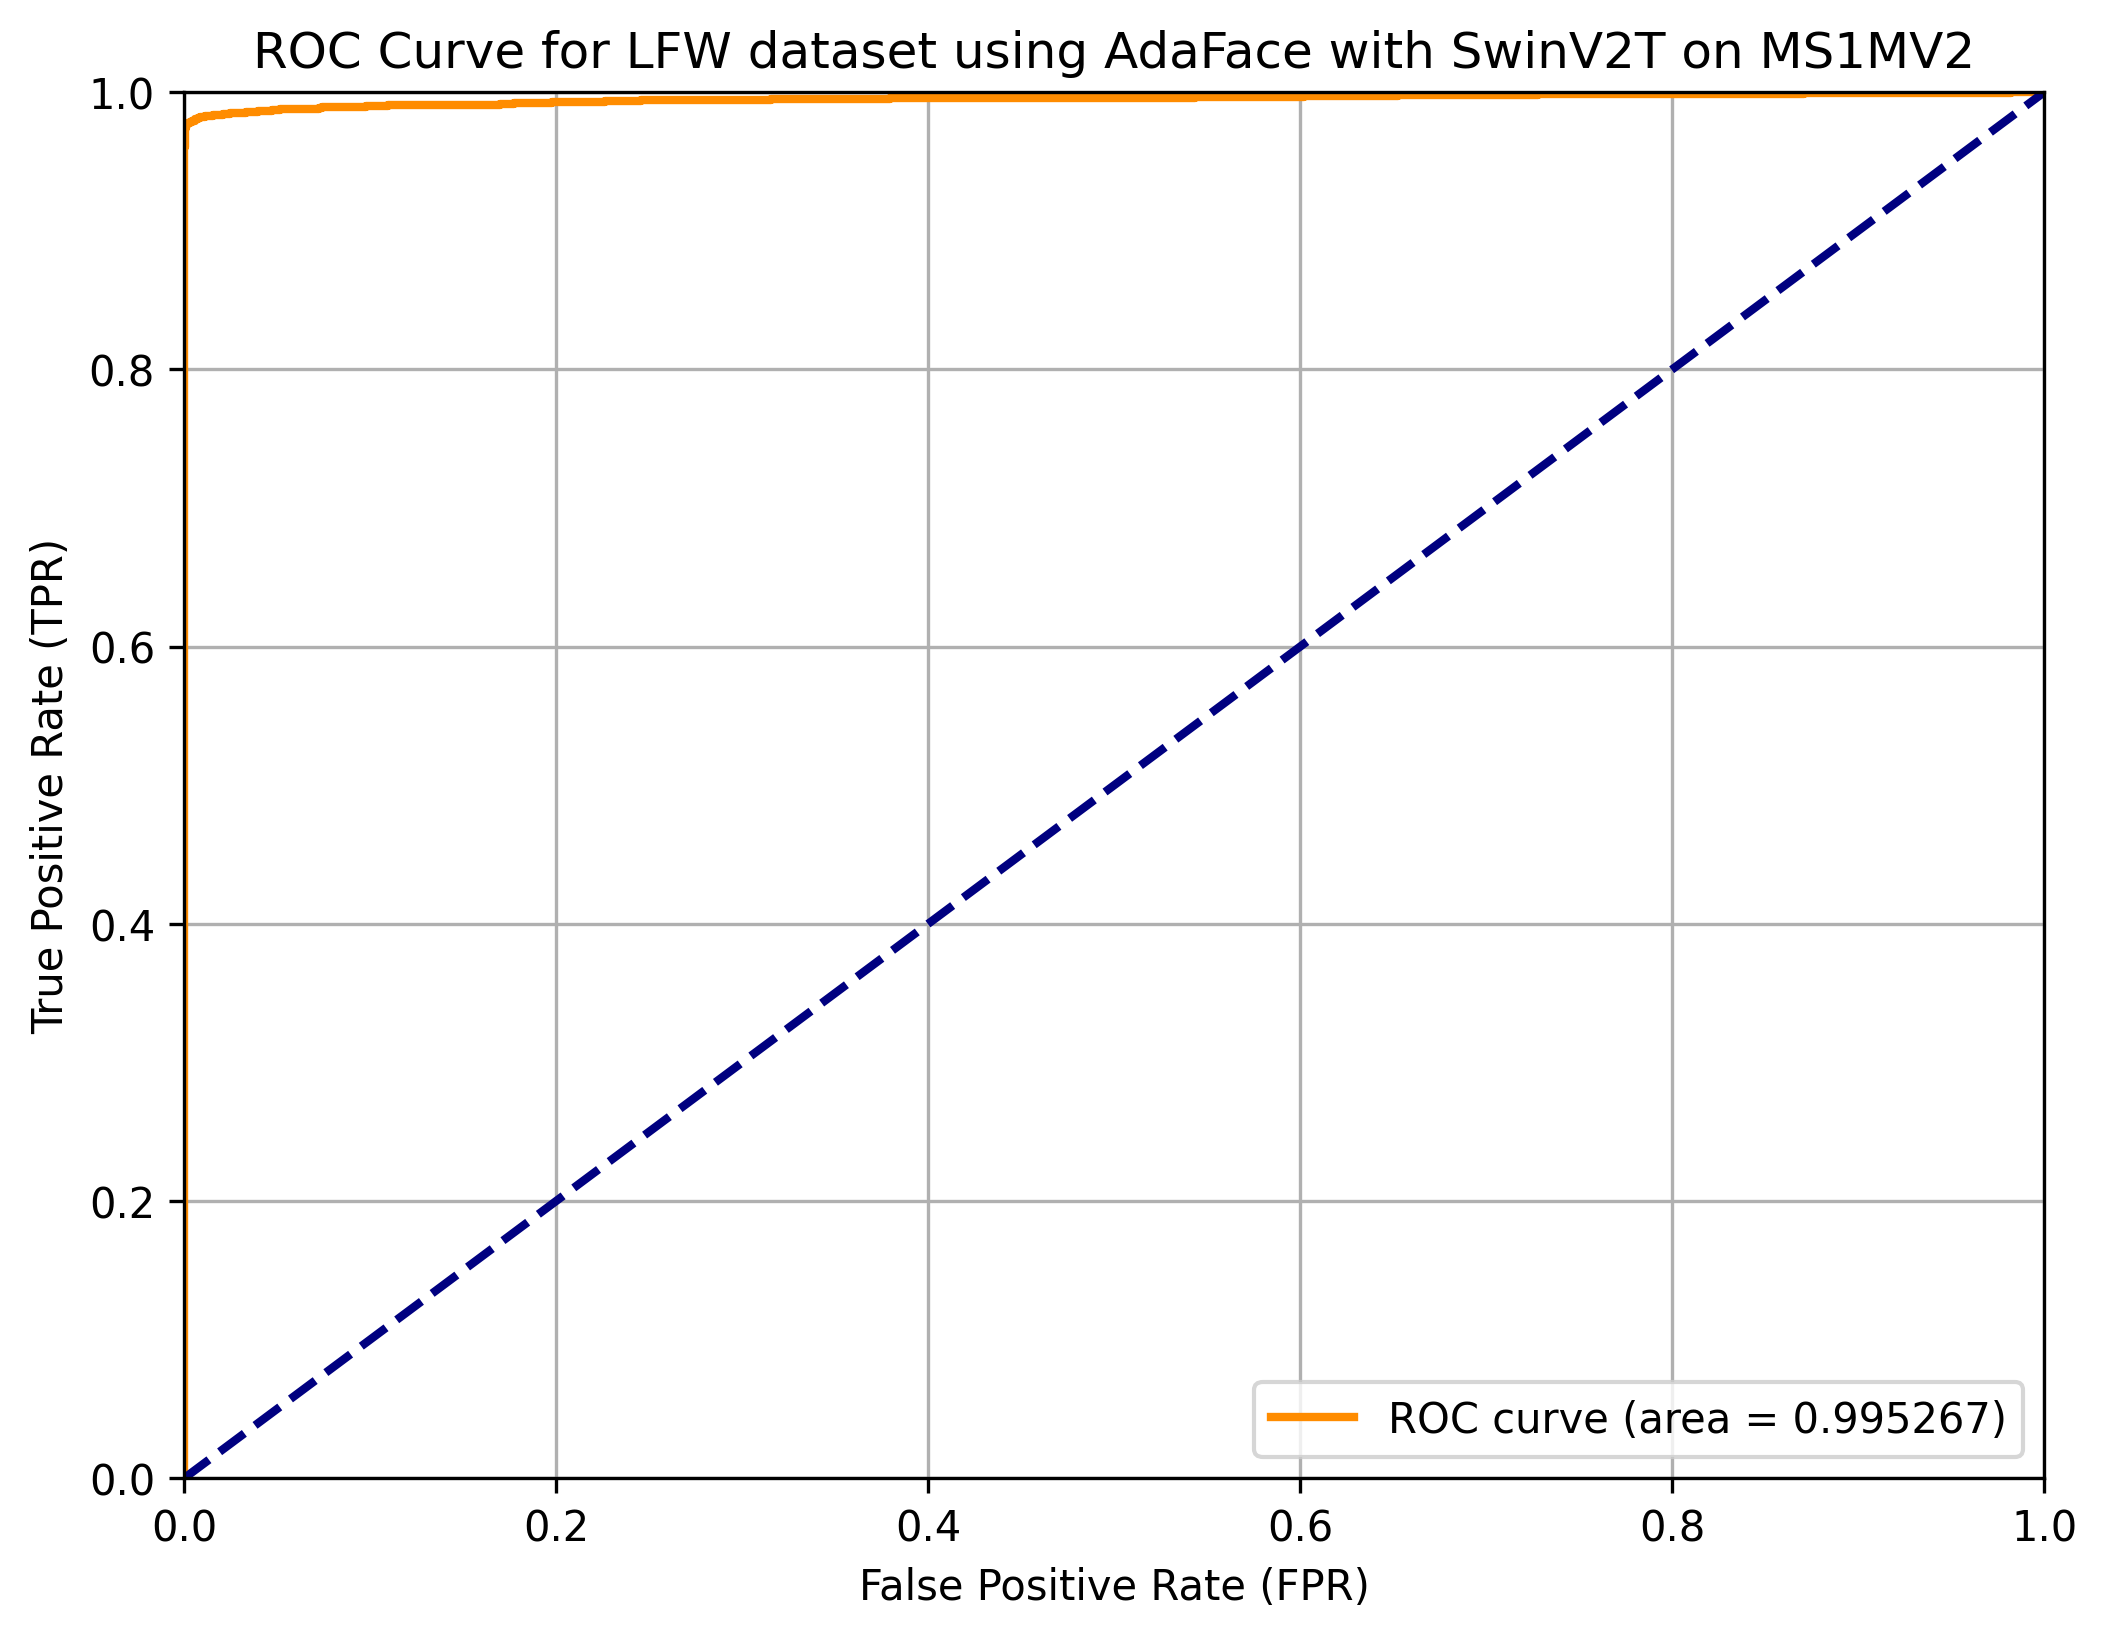

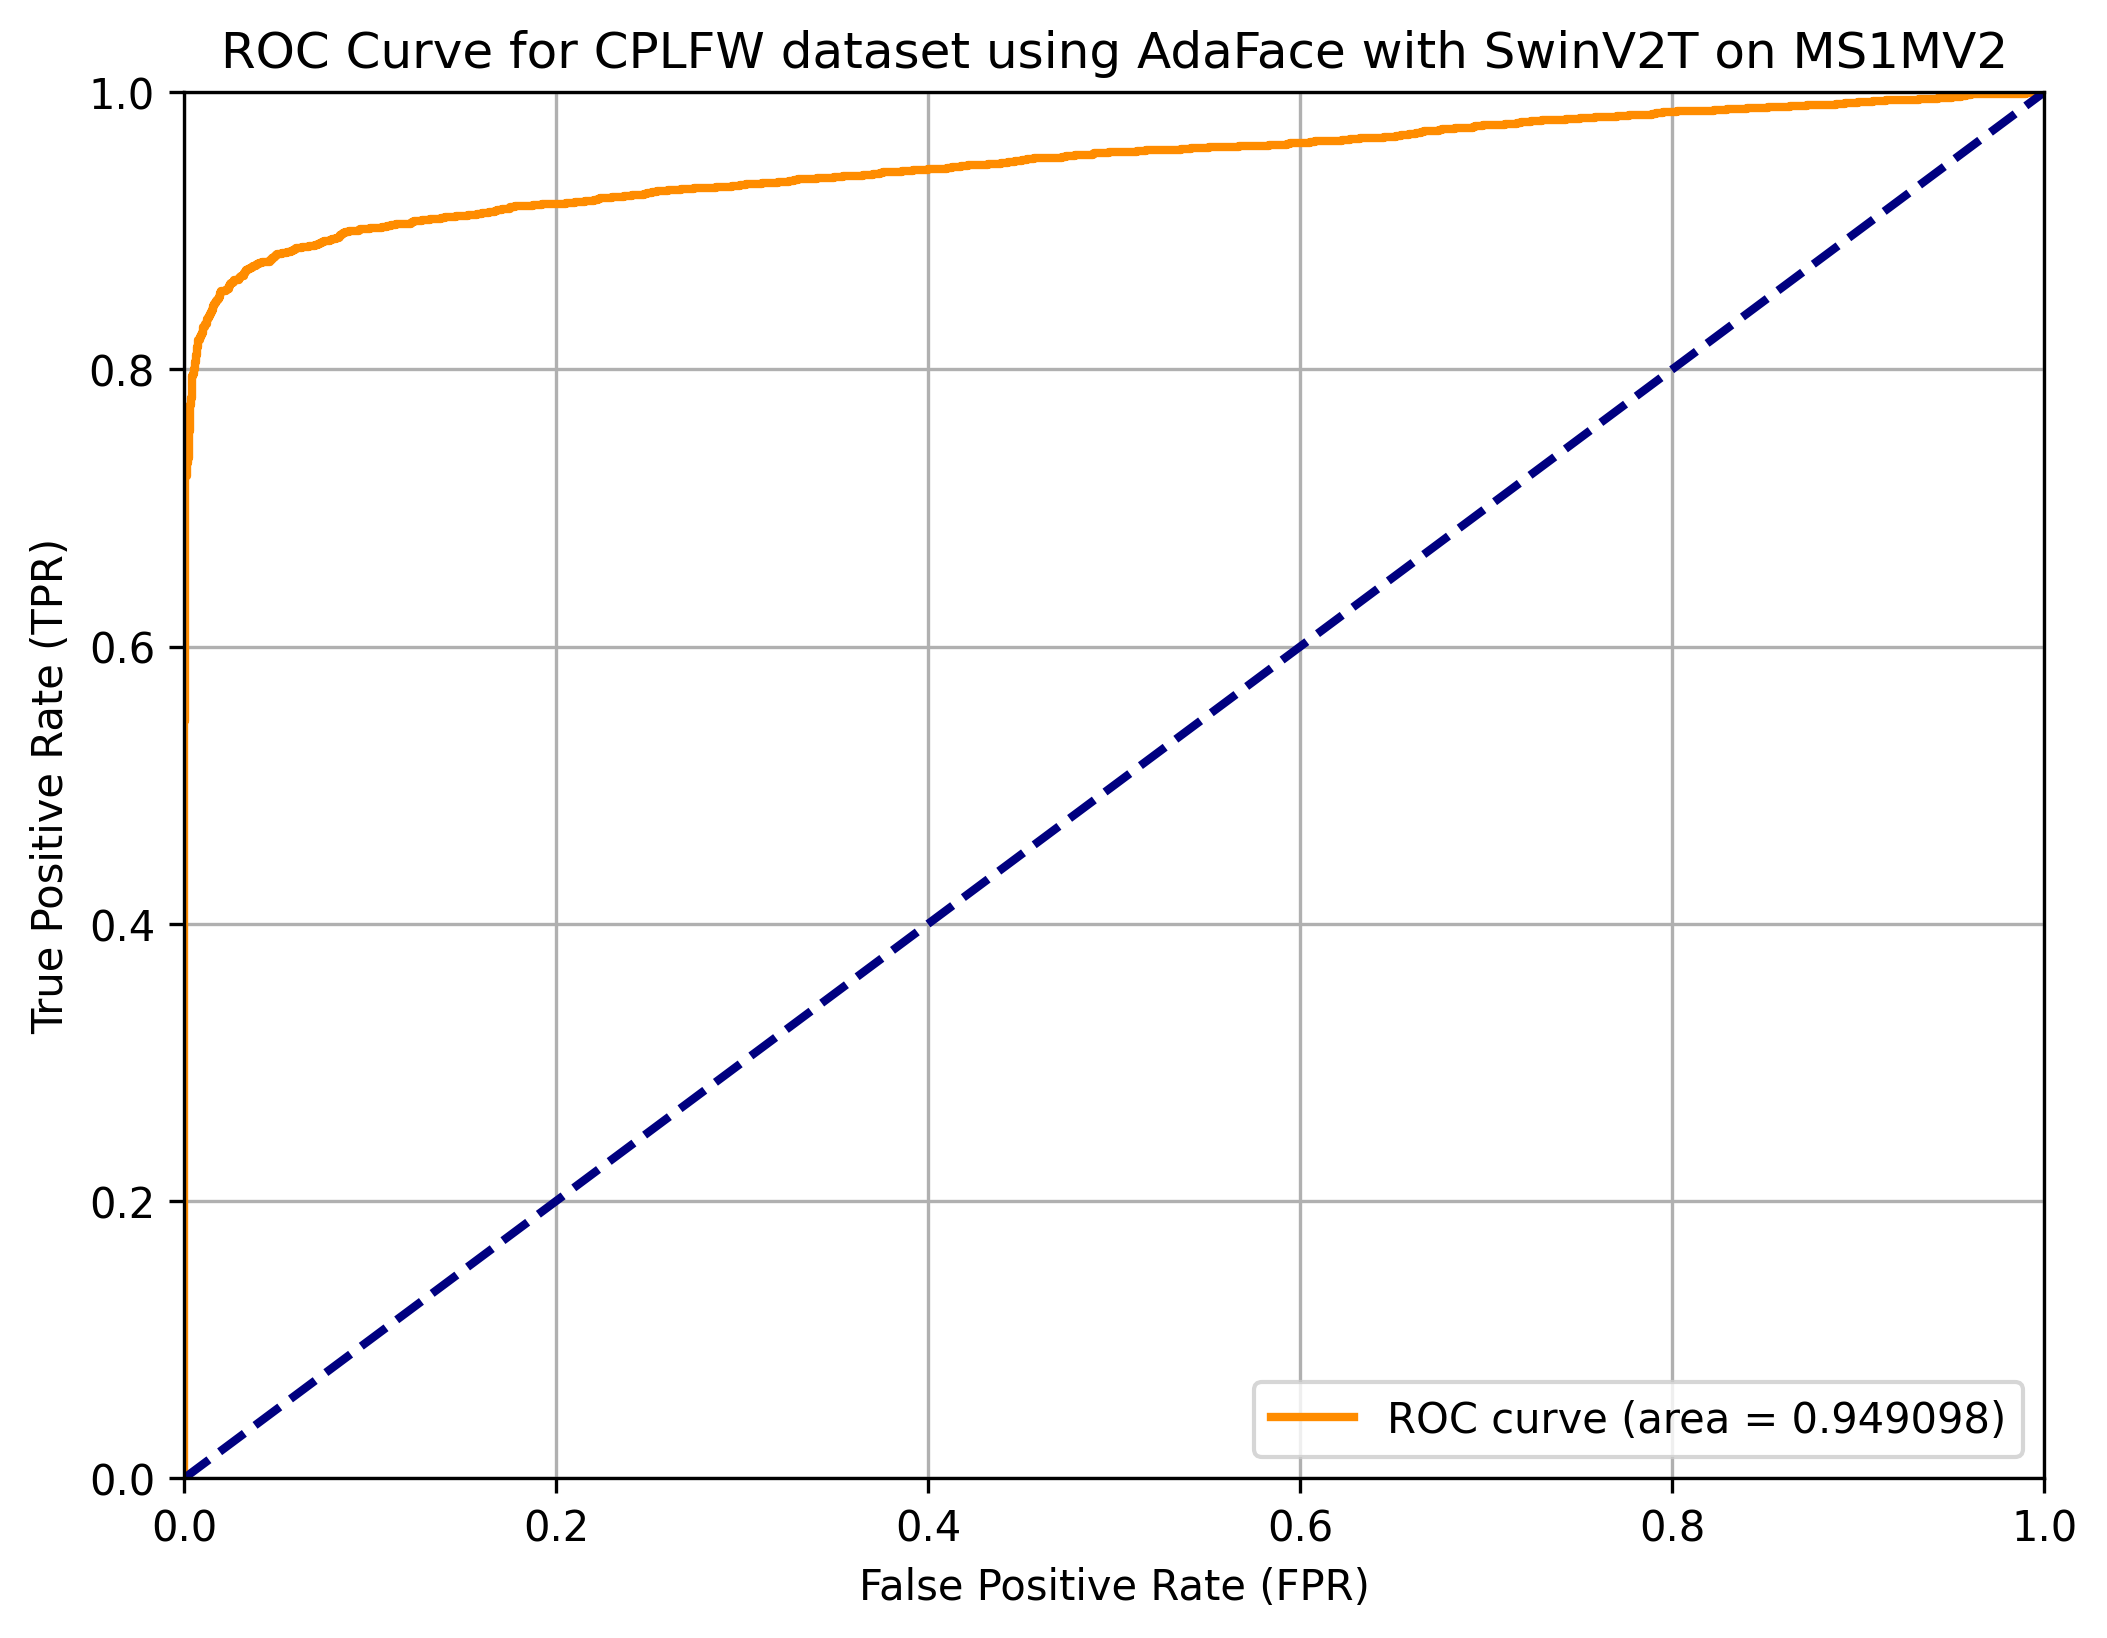

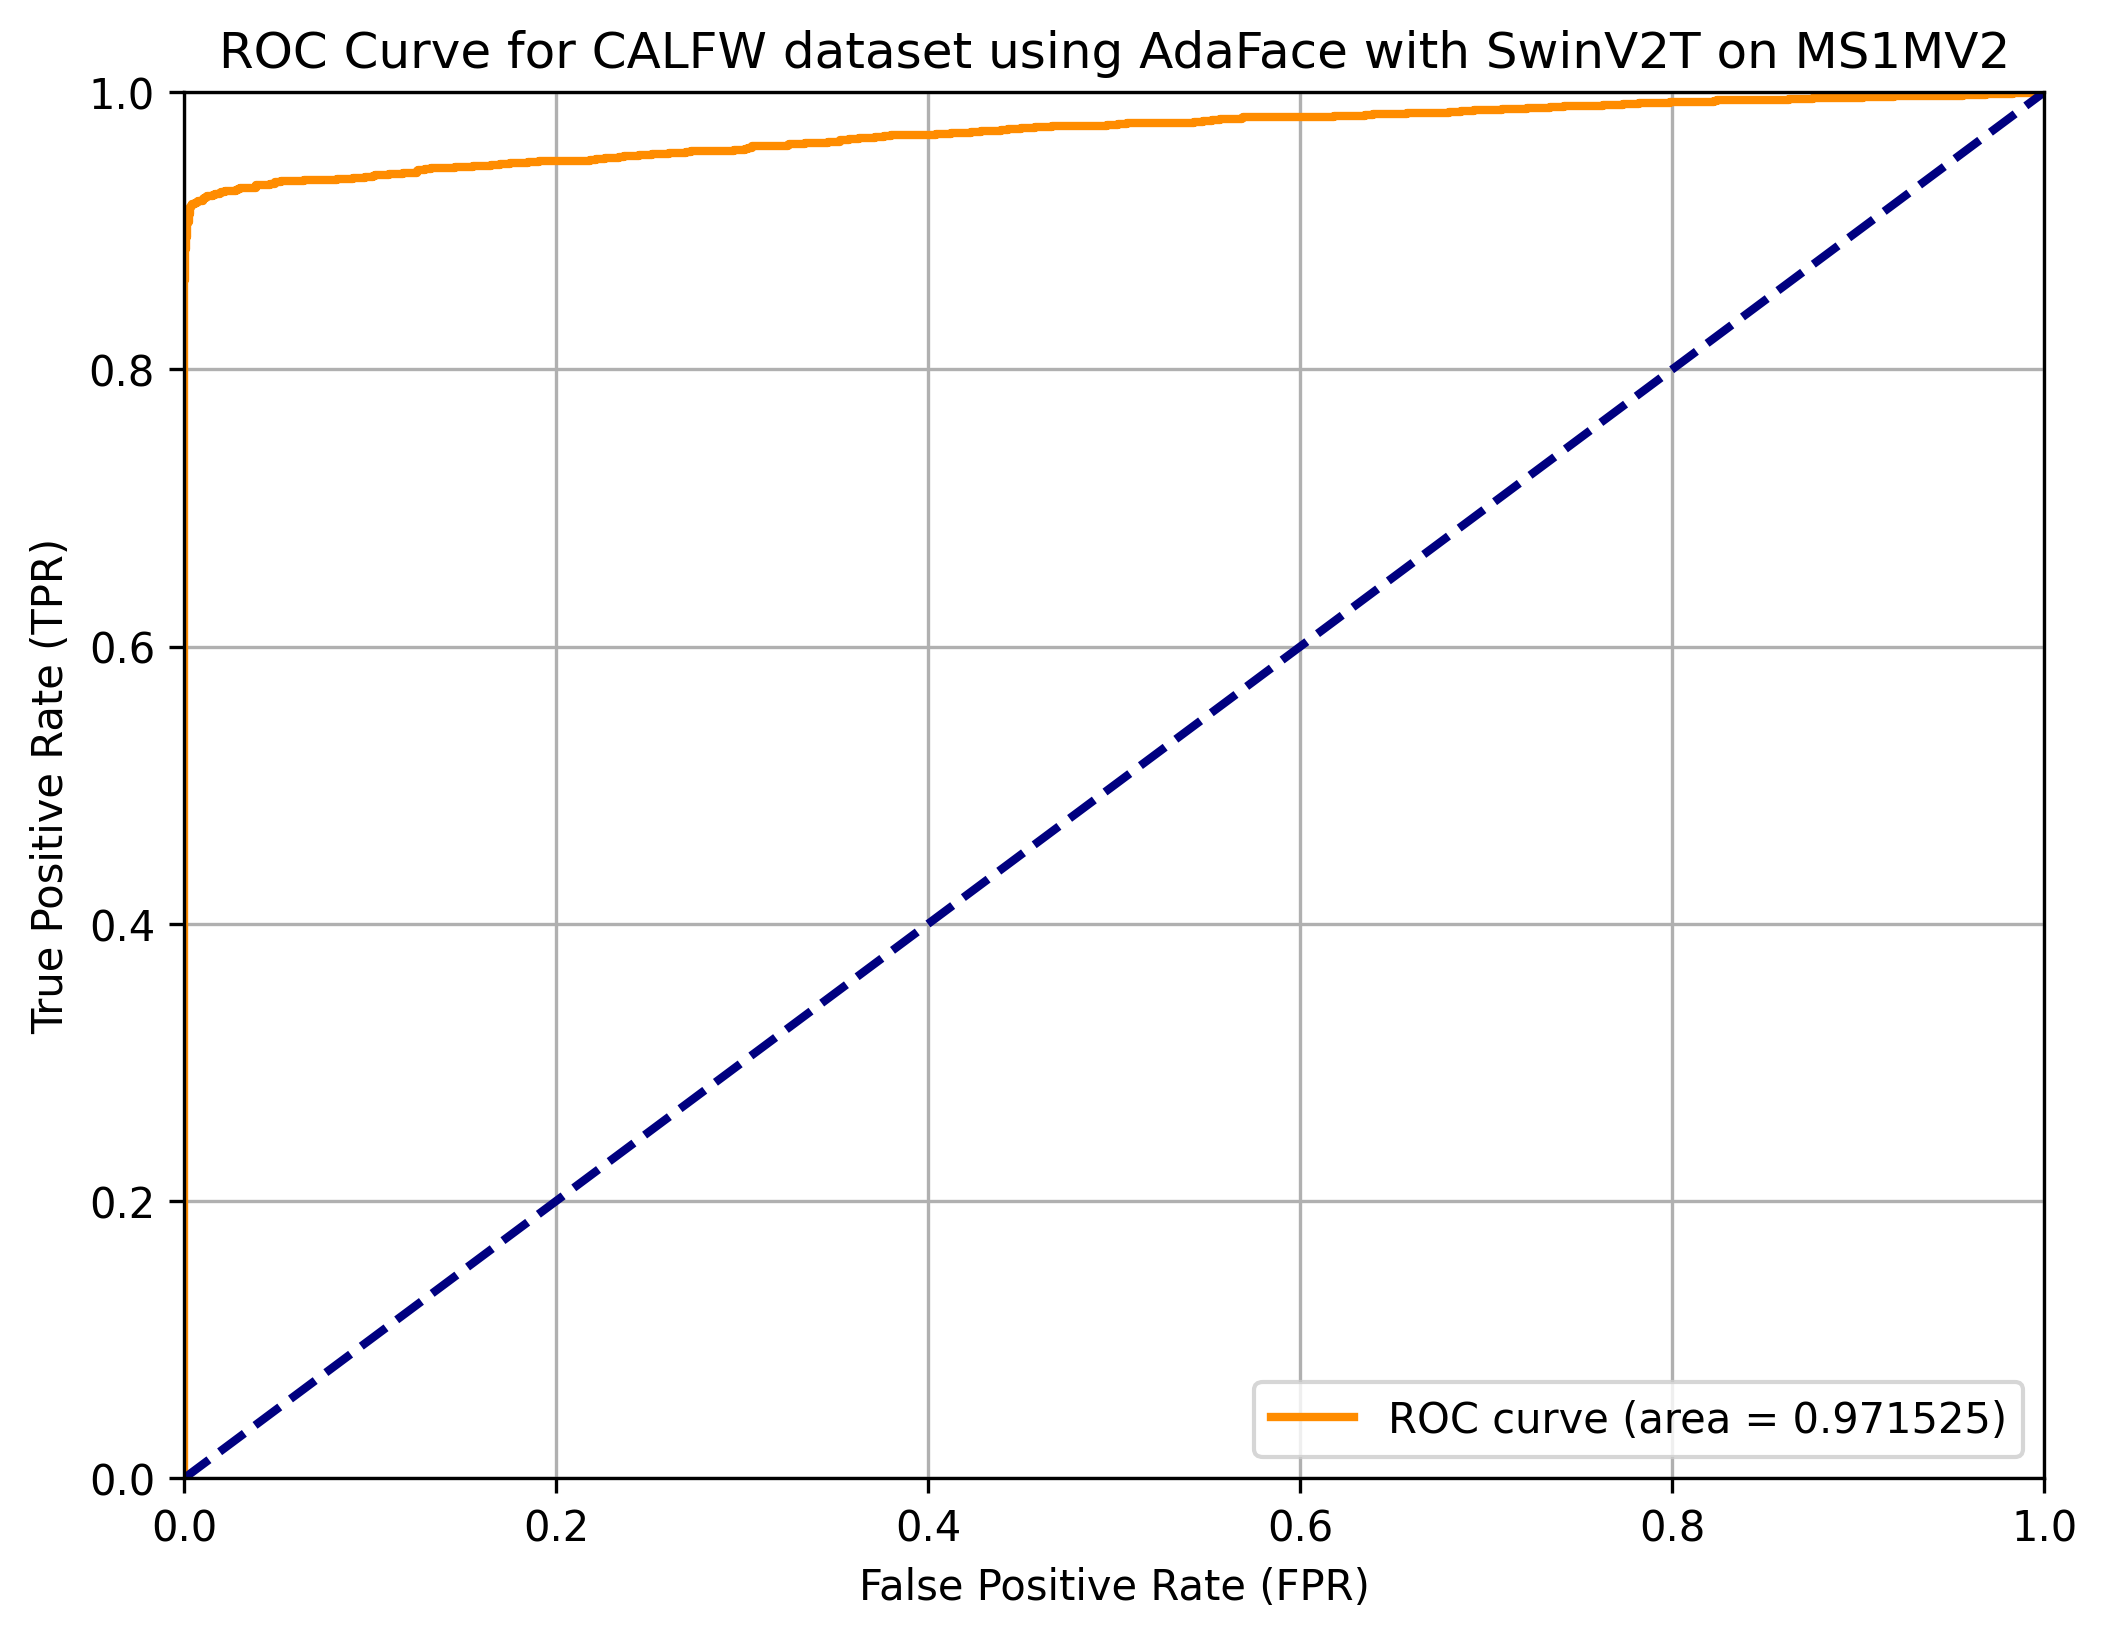

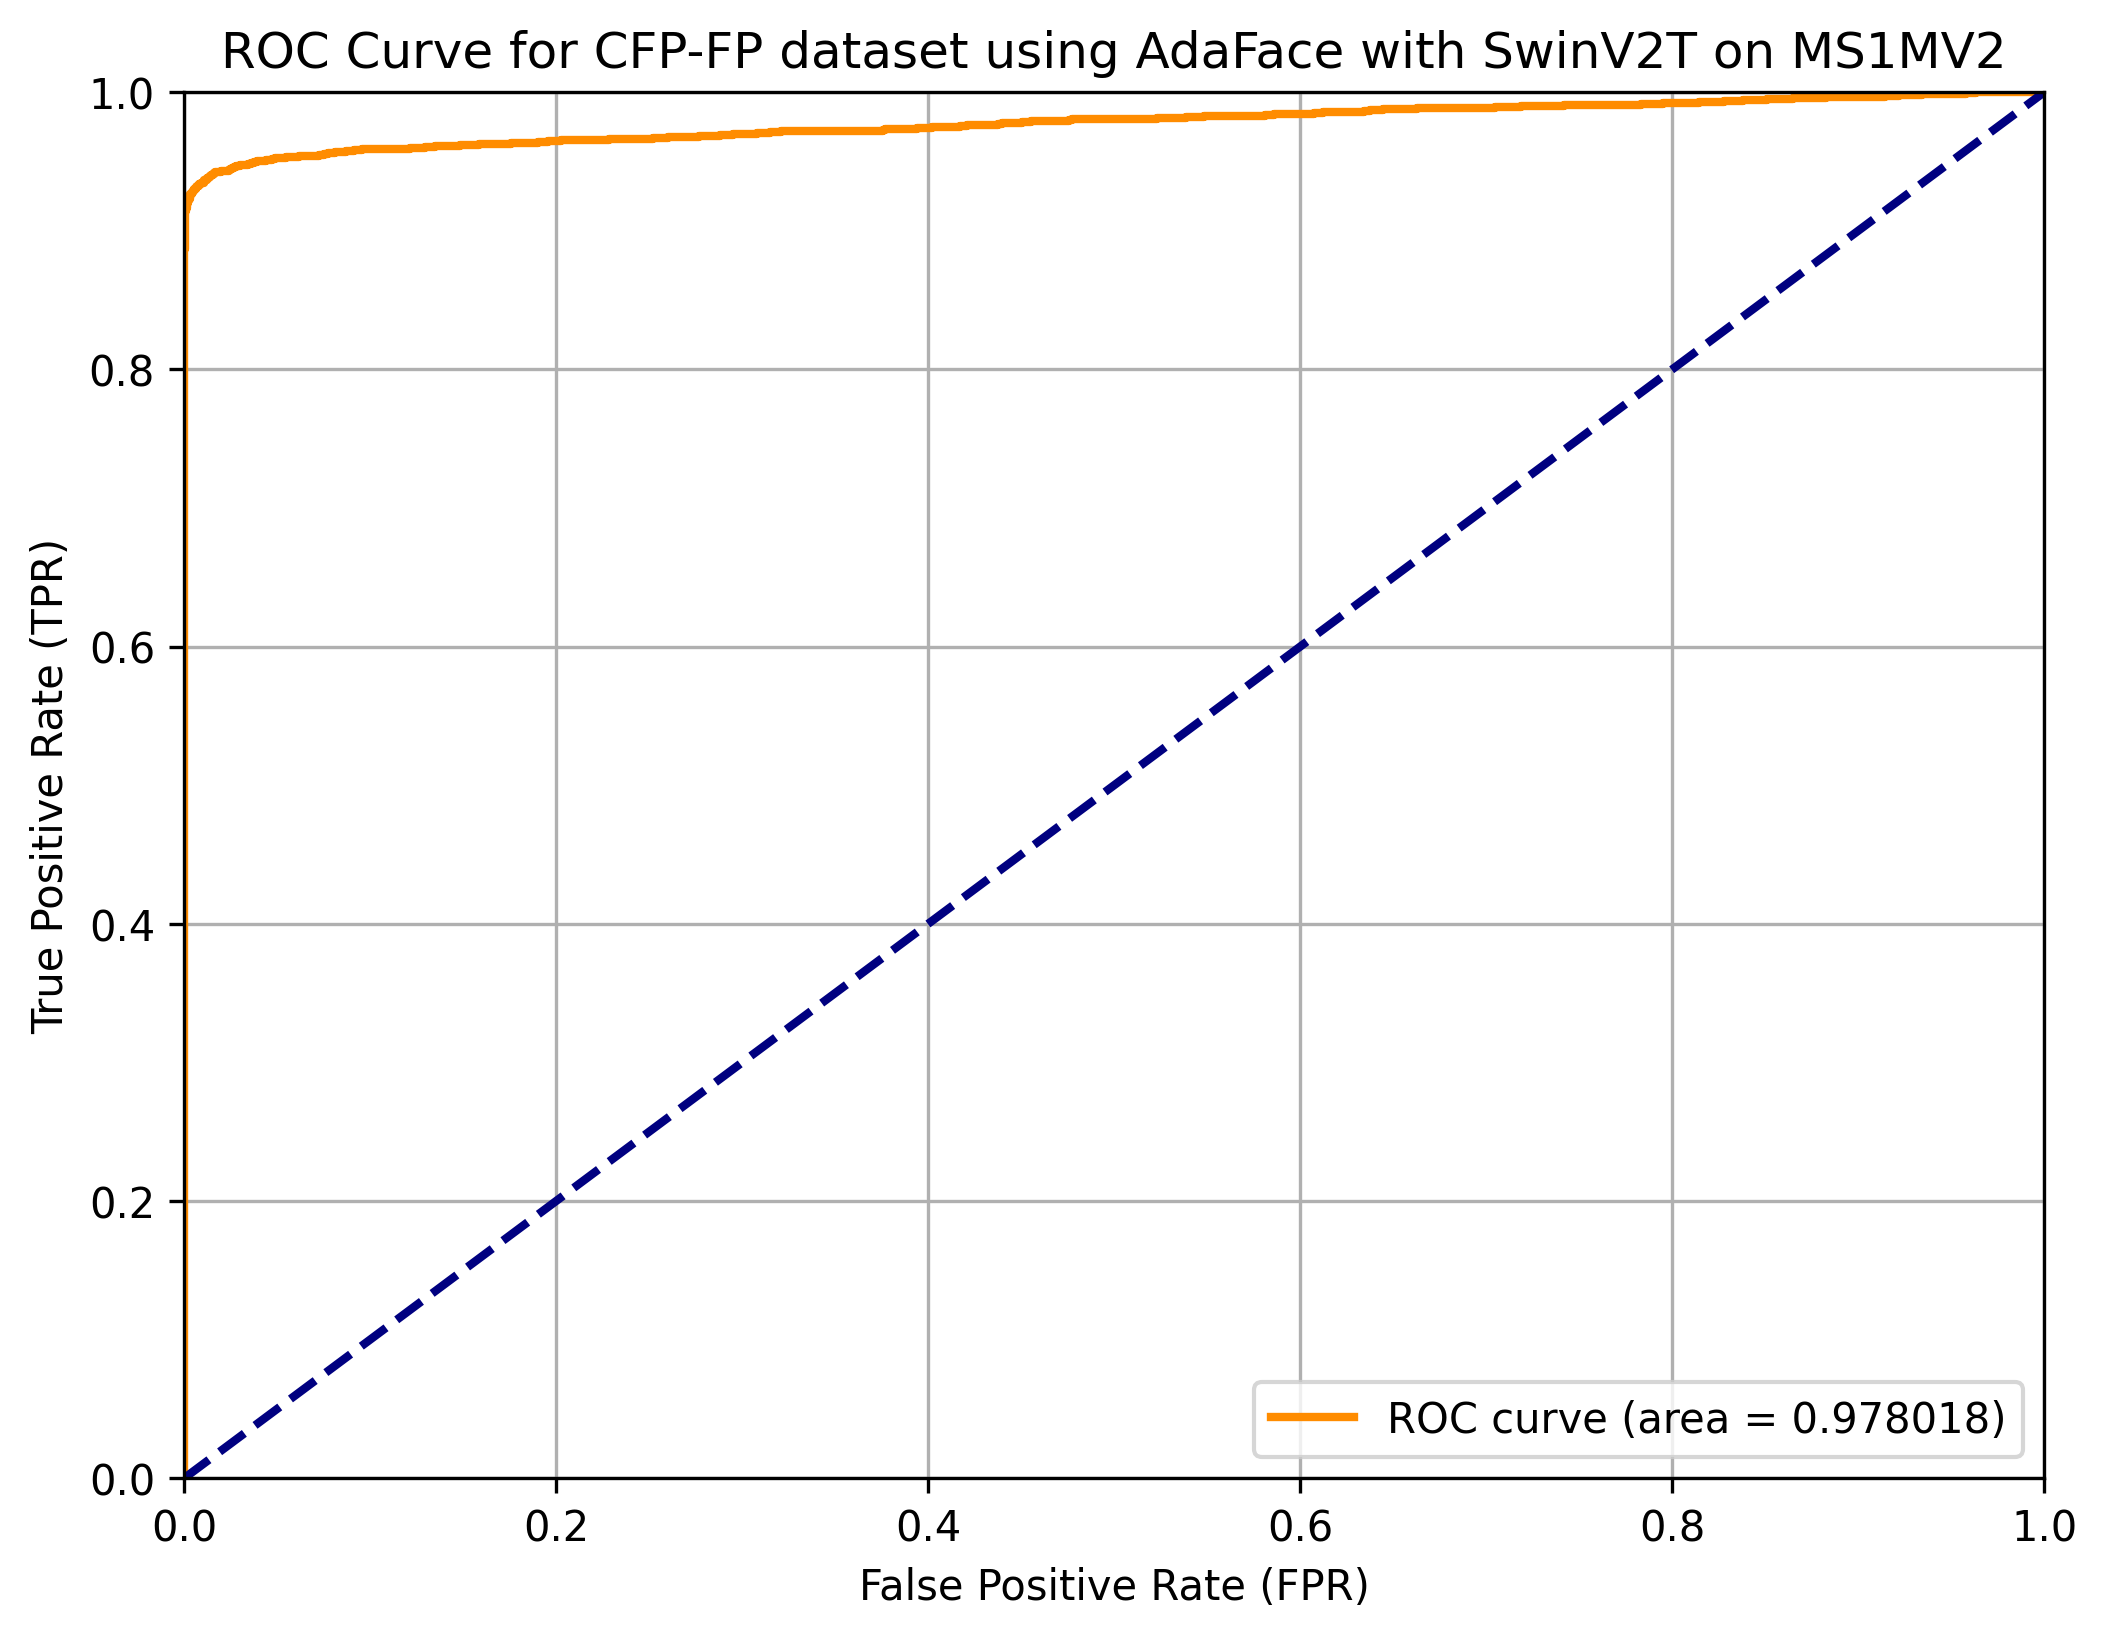

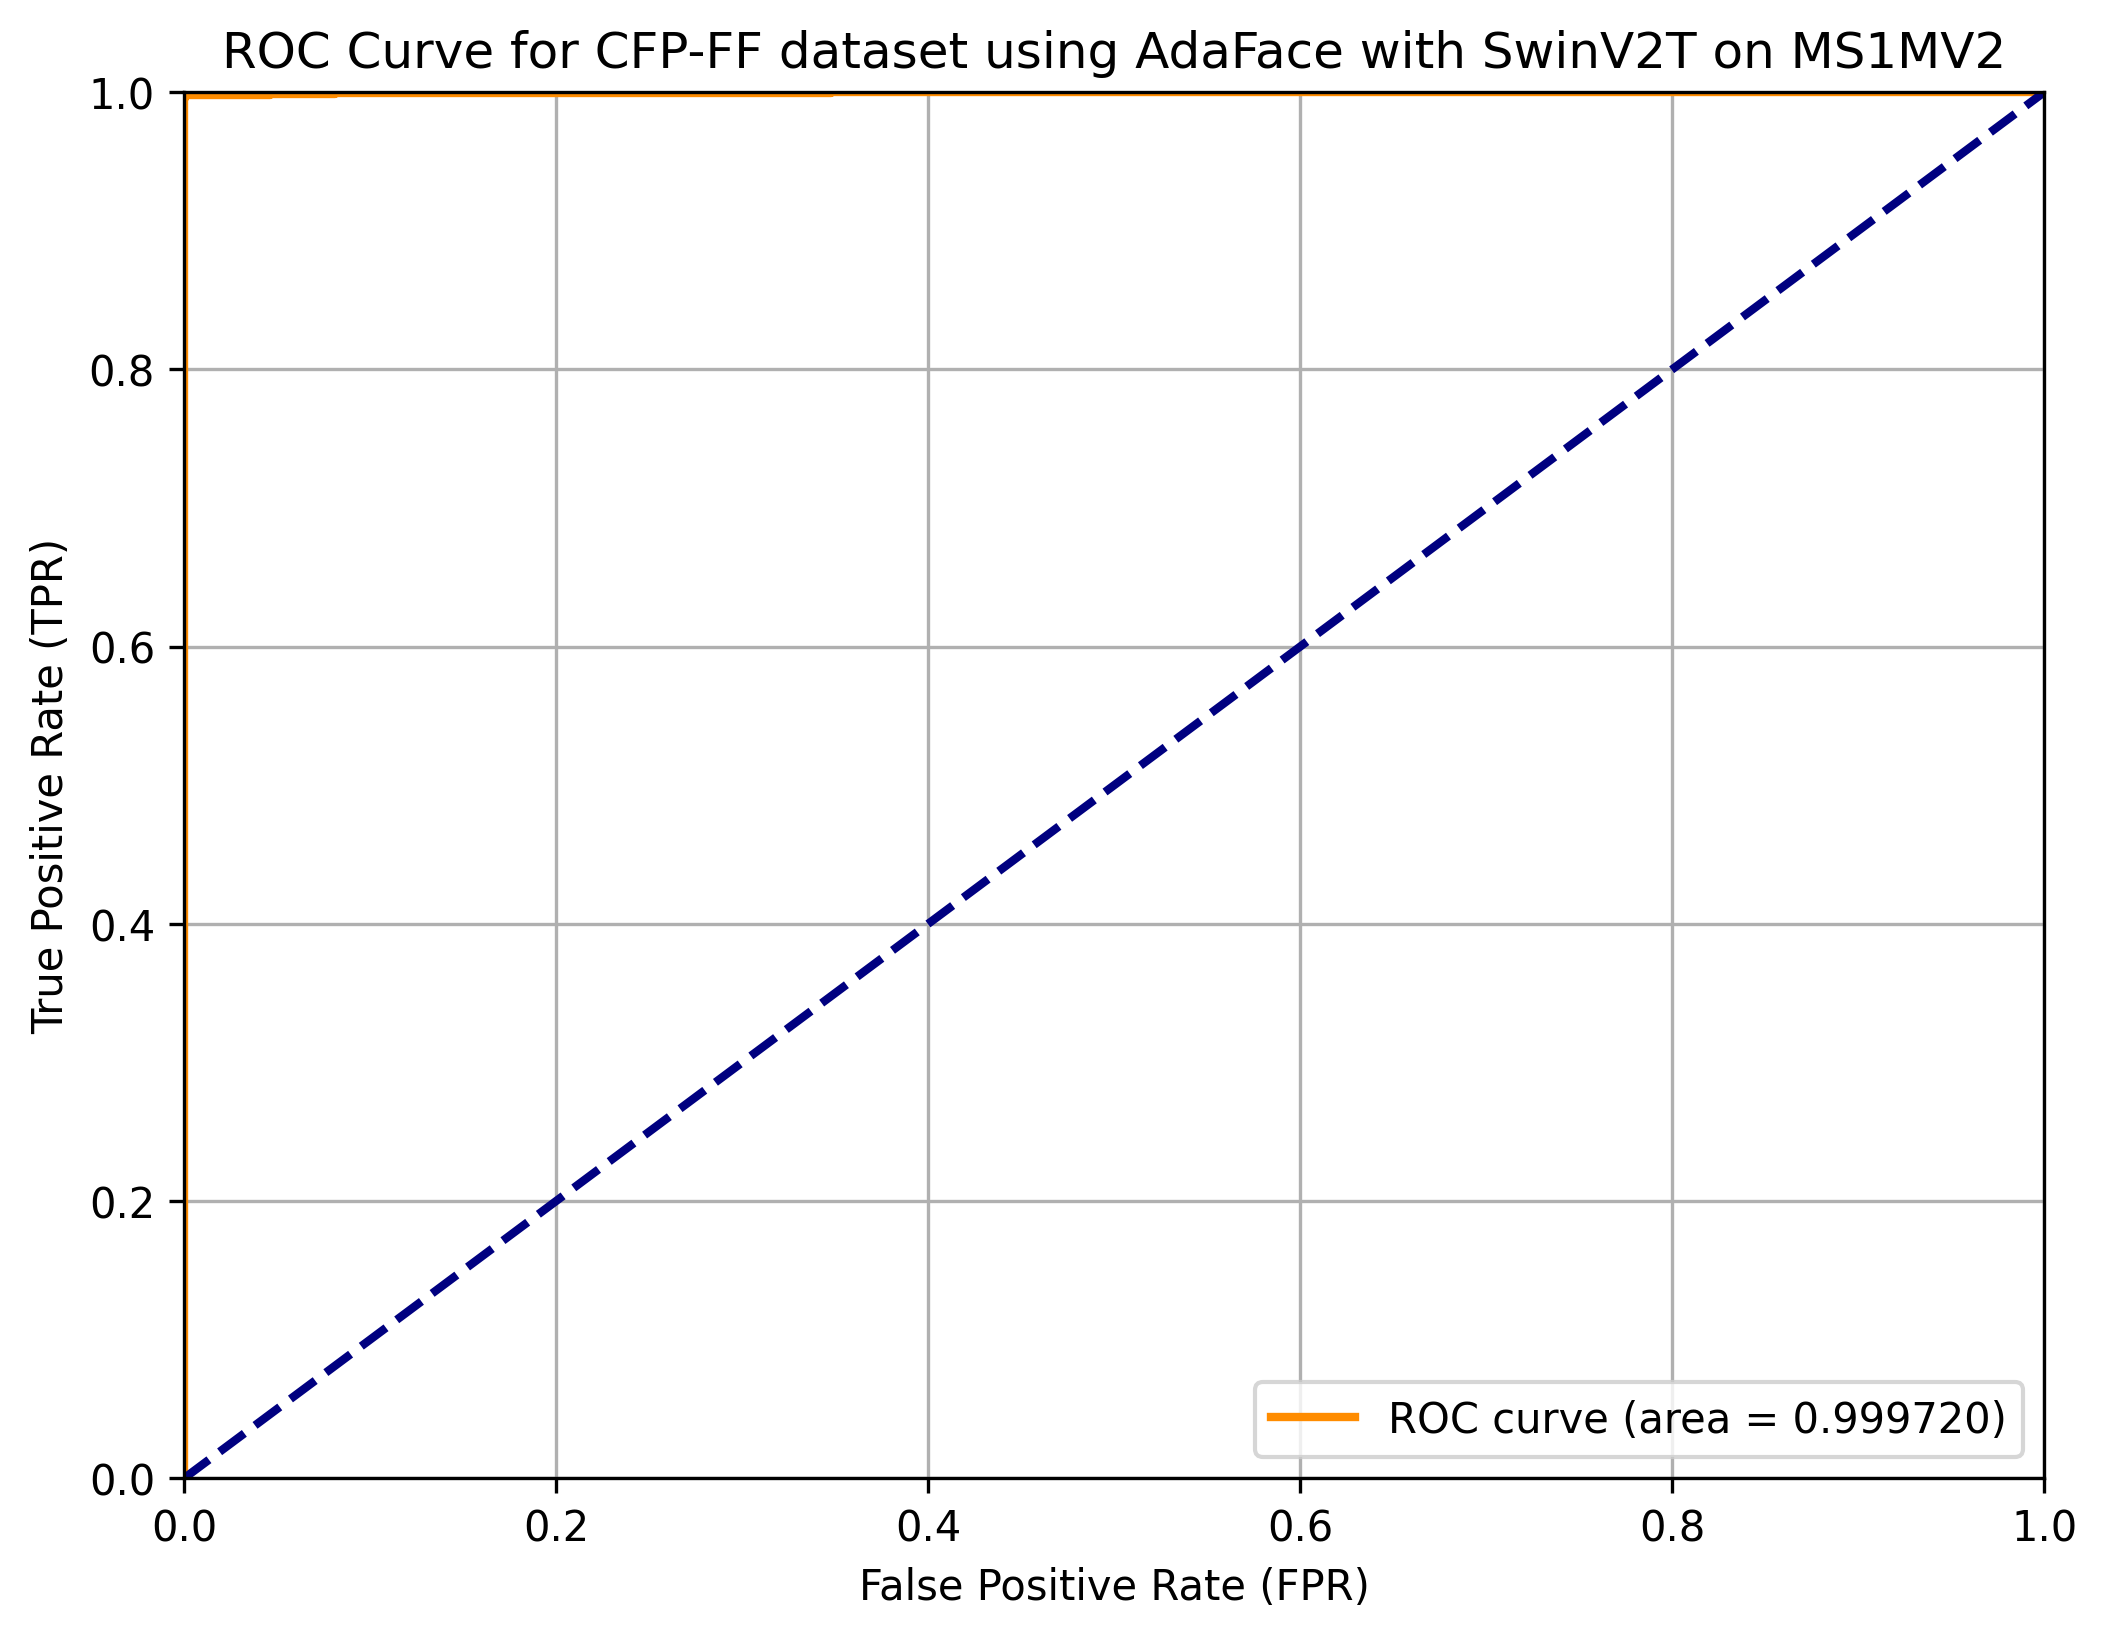

In [8]:
output_dir = os.path.join('data', 'results', 'AdaFace using MS1MV2 and SwinV2T')
for key in metrics.keys():
    accuracy, precision, recall, f1_score, auc, fpr, tpr, thresholds = metrics[key]

    print(f'{key} dataset got:')
    print(f'\t{100 * accuracy:.8f} accuracy.')
    print(f'\t{100 * precision:.8f} precision.')
    print(f'\t{100 * recall:.8f} recall.')
    print(f'\t{100 * f1_score:.8f} f1_score.')

    roc_title = f'ROC Curve for {key} dataset using AdaFace with SwinV2T on MS1MV2'
    with open(os.path.join(output_dir, 'metrics.txt'), 'a') as f:
        f.writelines(f"""
          {key} dataset got:
          \t{100 * accuracy:.8f} accuracy.
          \t{100 * precision:.8f} precision.
          \t{100 * recall:.8f} recall.
          \t{100 * f1_score:.8f} f1_score.
    """)
    plt.figure(figsize = (8, 6), dpi = 300)
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {auc:.6f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(roc_title)
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{roc_title}.png'))


In [21]:
path = os.path.join('data', 'models', 'AdaFace with SwinV2T on MS1MV2', 'model.pth')

In [22]:
torch.save(backbone.state_dict(), path)

## Davit + AdaFace + MS1MV2

In [4]:
checkpoint_path = os.path.join('checkpoints', 'davit_t_adaface_MS1MV2_Dataset', 'epoch=26-train_loss=7.29965.ckpt')
checkpoint = torch.load(checkpoint_path, map_location = 'cpu')

In [5]:
print(checkpoint.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'MixedPrecision', 'hparams_name', 'hyper_parameters'])


In [6]:
model = FaceRecognitionModel(**checkpoint['hyper_parameters'])


AdaFace with the following property
self.m 0.4
self.h 0.333
self.s 64.0
self.t_alpha 0.99


In [7]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [10]:
backbone = torch.nn.Sequential(
    model.backbone,
    model.recognition_subnet
)

In [11]:
metrics = evaluate_backbone(backbone)

Processing dataset: LFW...
Finished processing LFW.
Processing dataset: CPLFW...
Finished processing CPLFW.
Processing dataset: CALFW...
Finished processing CALFW.
Processing dataset: CFP-FP...
Finished processing CFP-FP.
Processing dataset: CFP-FF...
Finished processing CFP-FF.


LFW dataset got:
	97.36666667 accuracy.
	98.61499590 precision.
	96.10000000 recall.
	97.32962246 f1_score.
CPLFW dataset got:
	89.50000000 accuracy.
	93.77884558 precision.
	84.55322371 recall.
	88.89714927 f1_score.
CALFW dataset got:
	94.91666667 accuracy.
	98.44536909 precision.
	91.26495923 recall.
	94.70807007 f1_score.
CFP-FP dataset got:
	94.41340691 accuracy.
	97.43996022 precision.
	91.22595170 recall.
	94.20559759 f1_score.
CFP-FF dataset got:
	99.78563254 accuracy.
	99.91436665 precision.
	99.65681539 recall.
	99.78491293 f1_score.


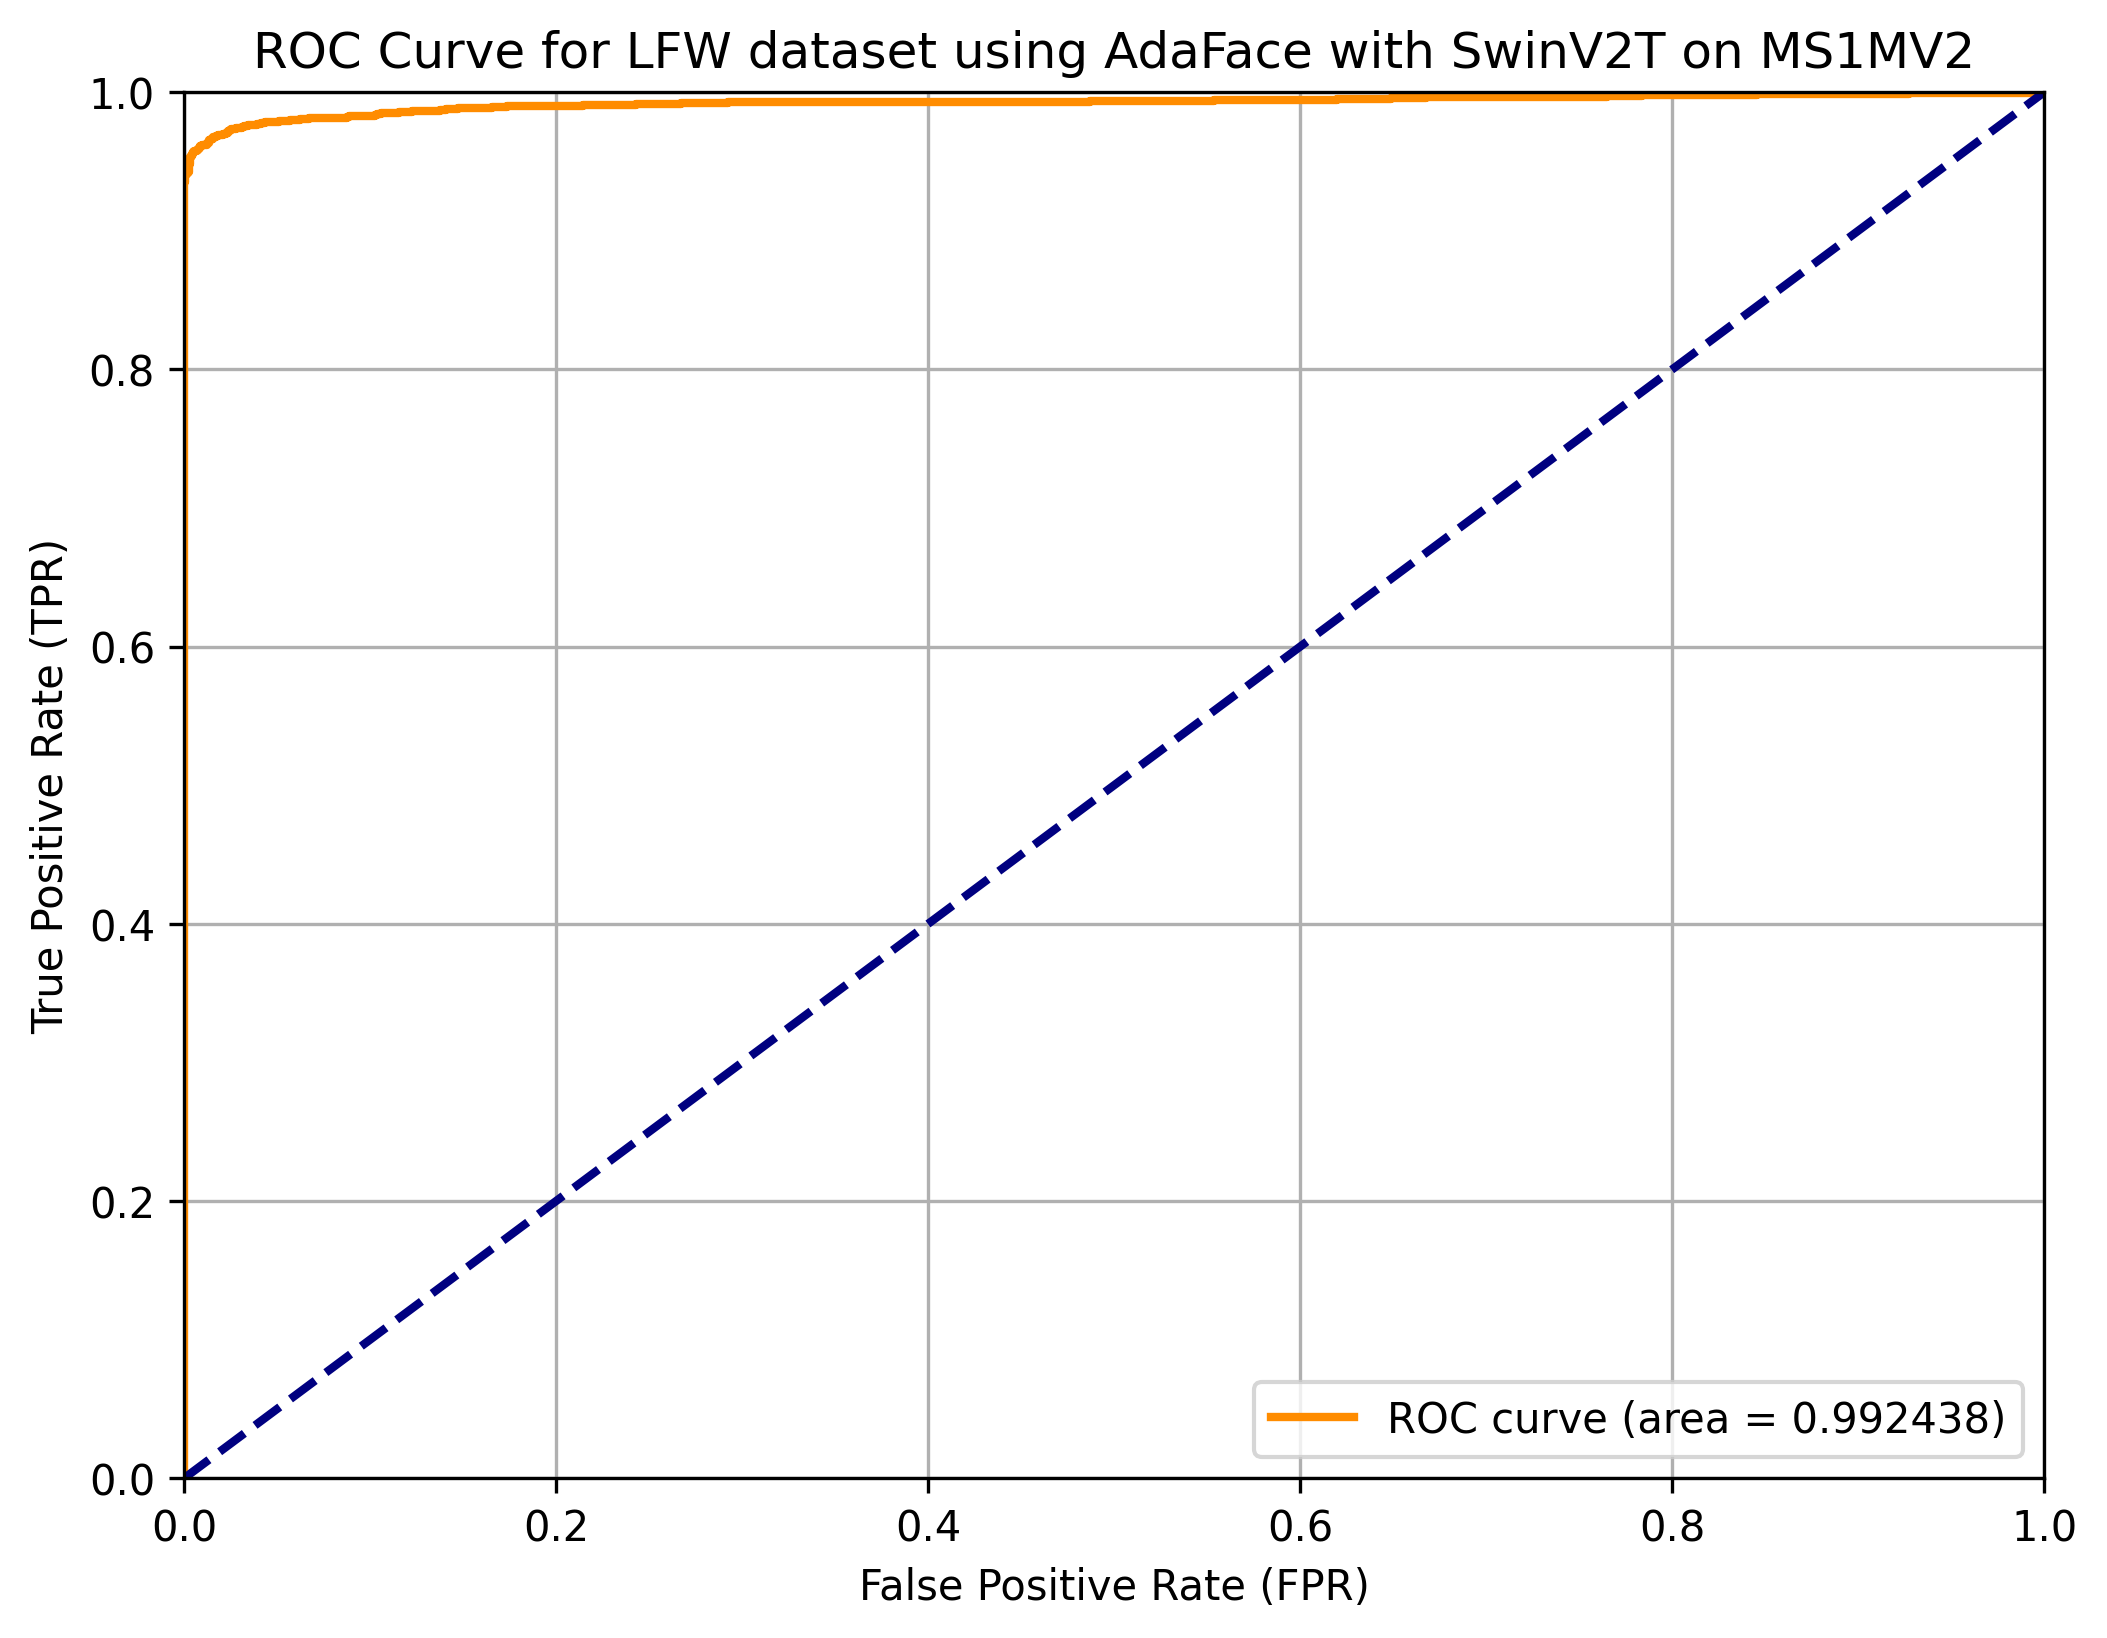

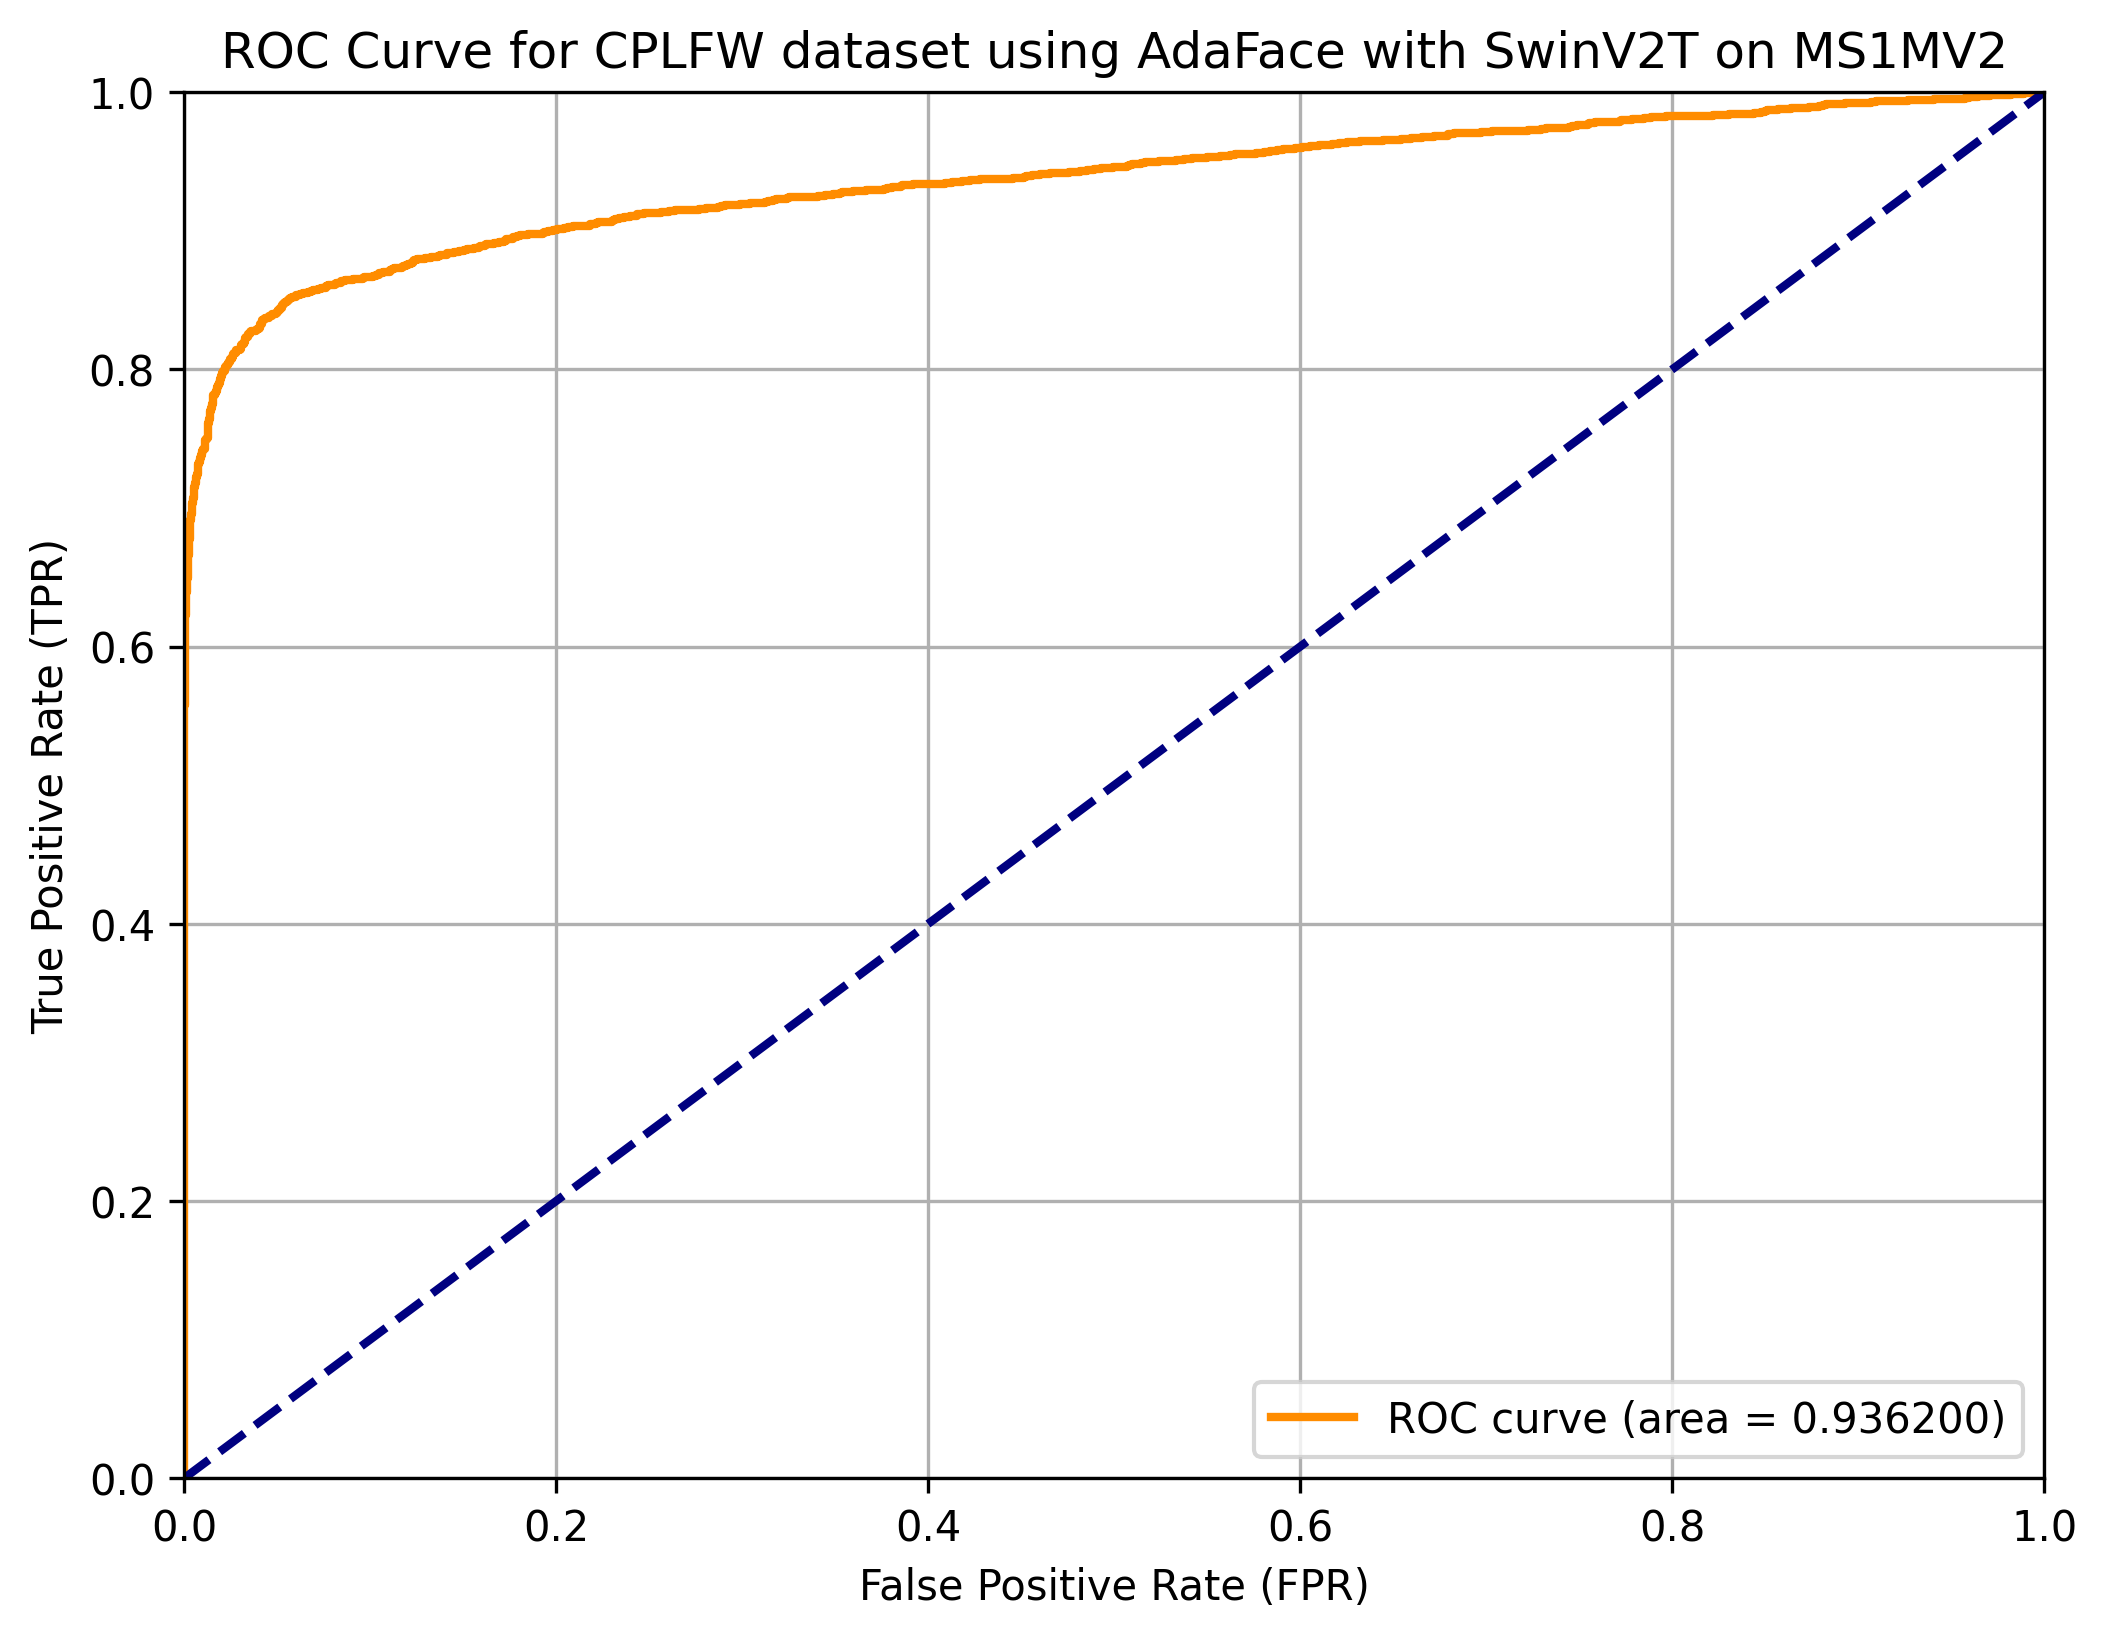

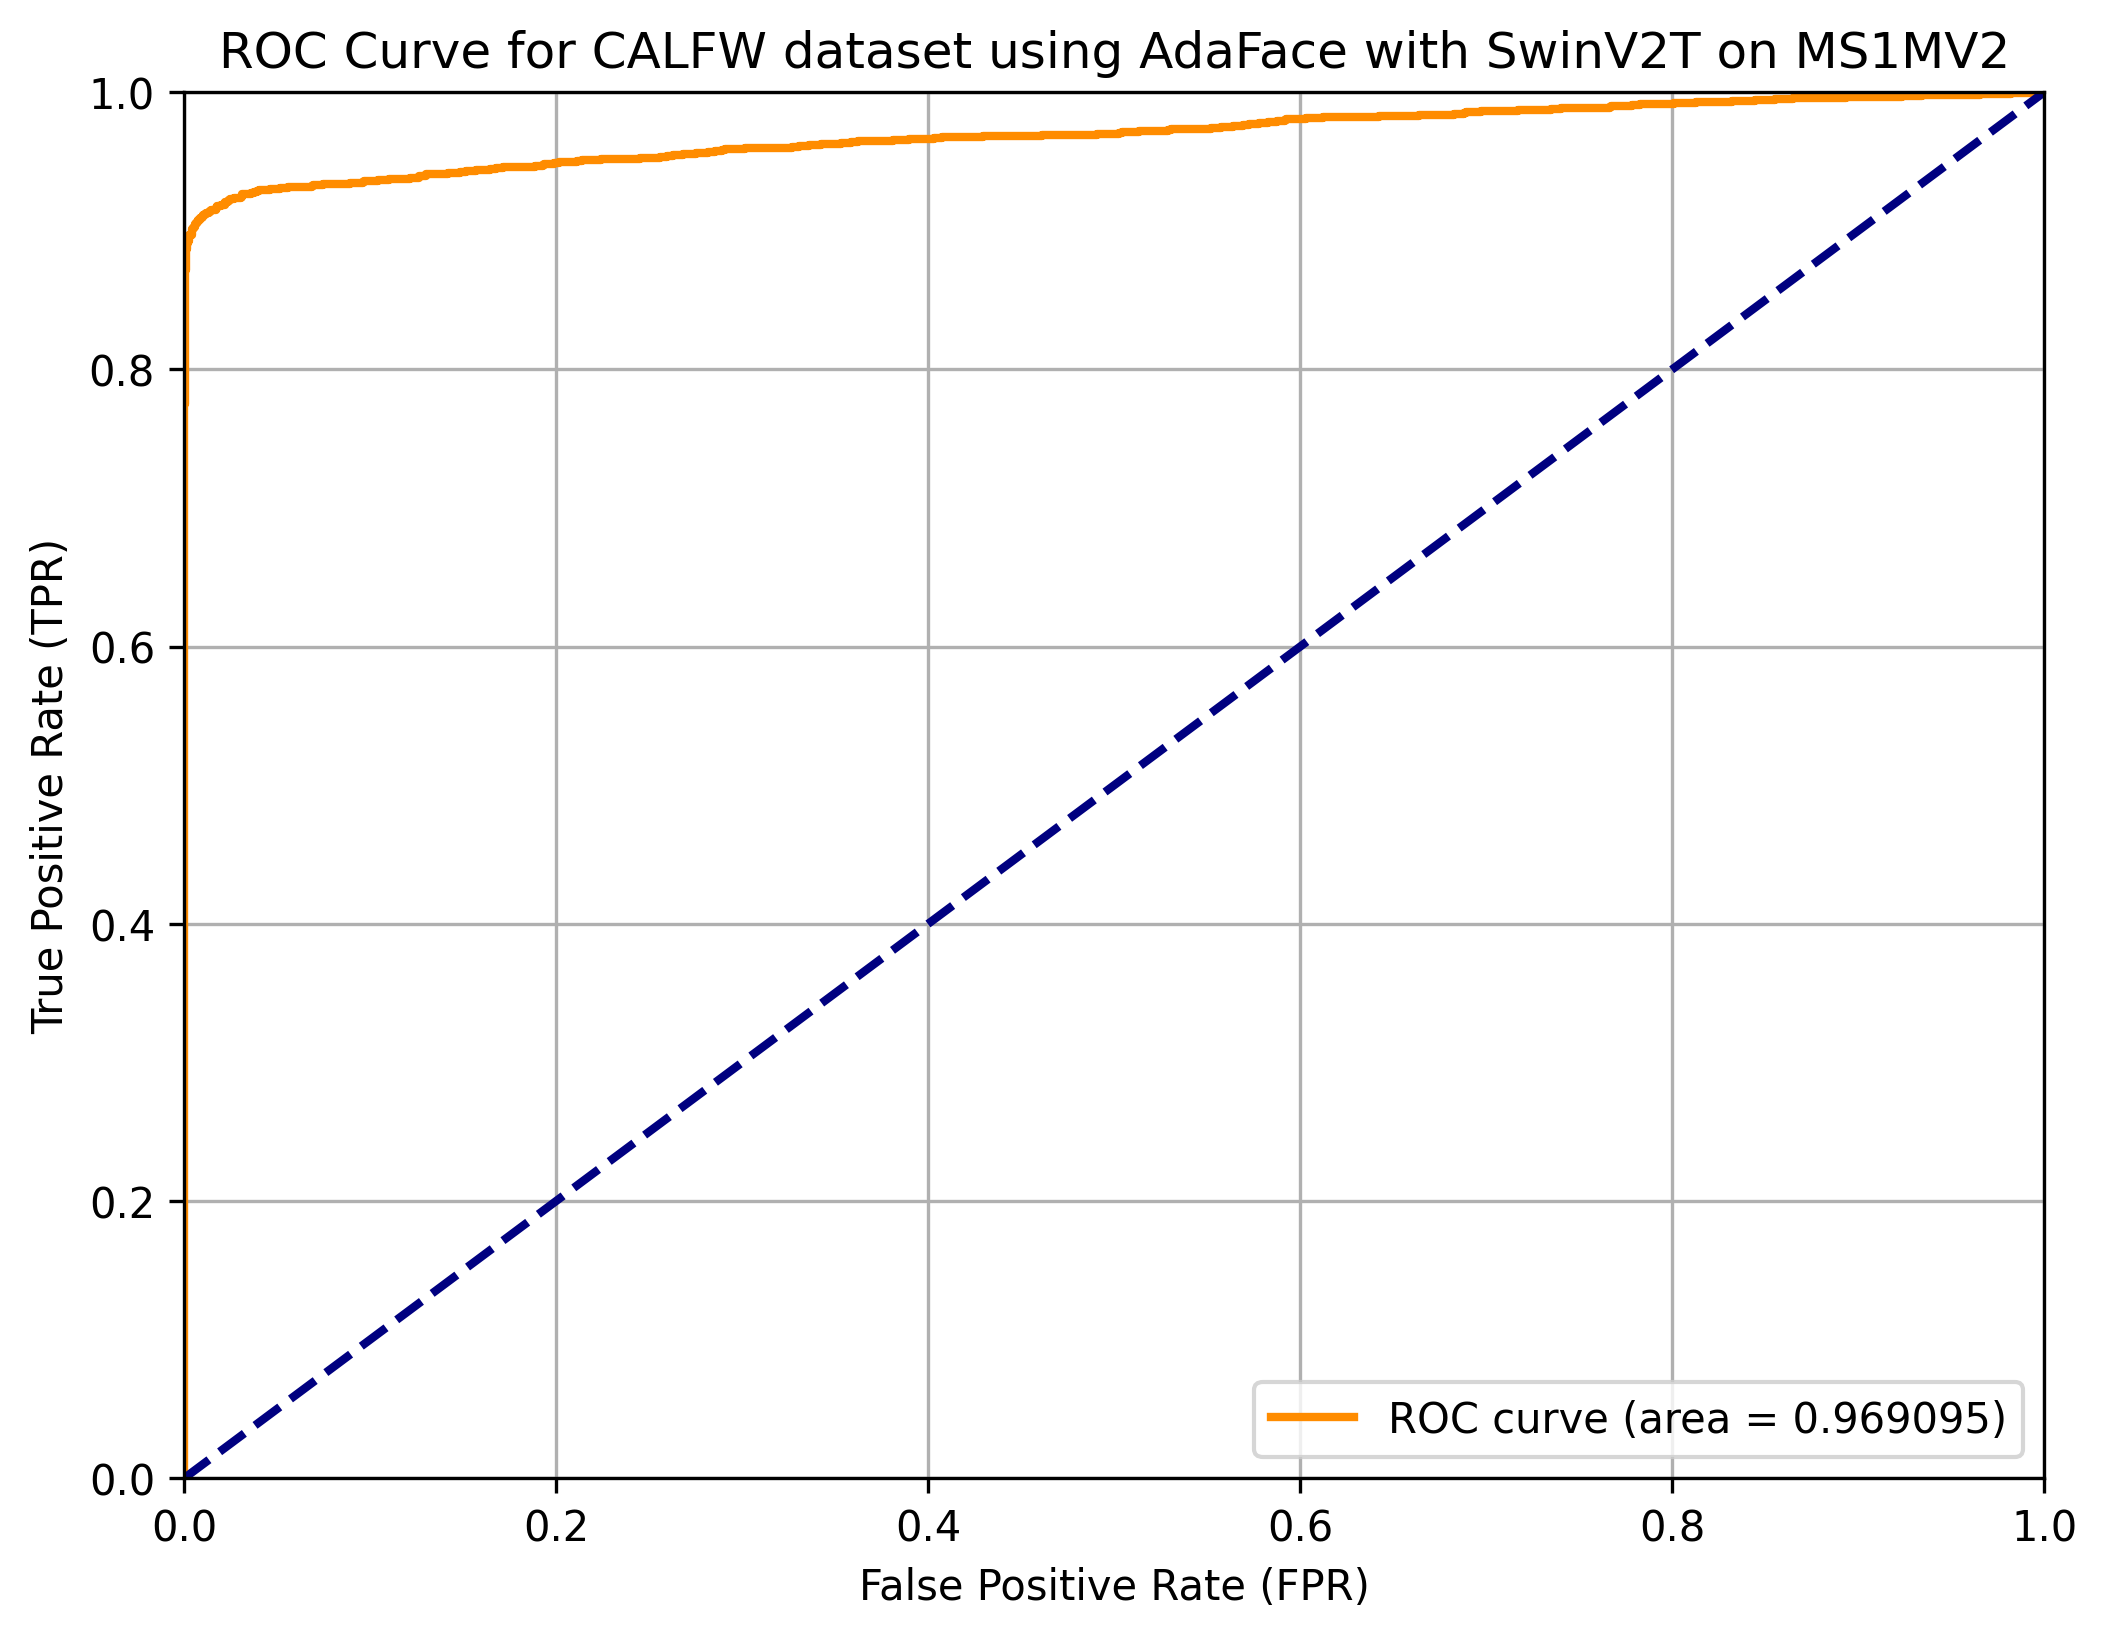

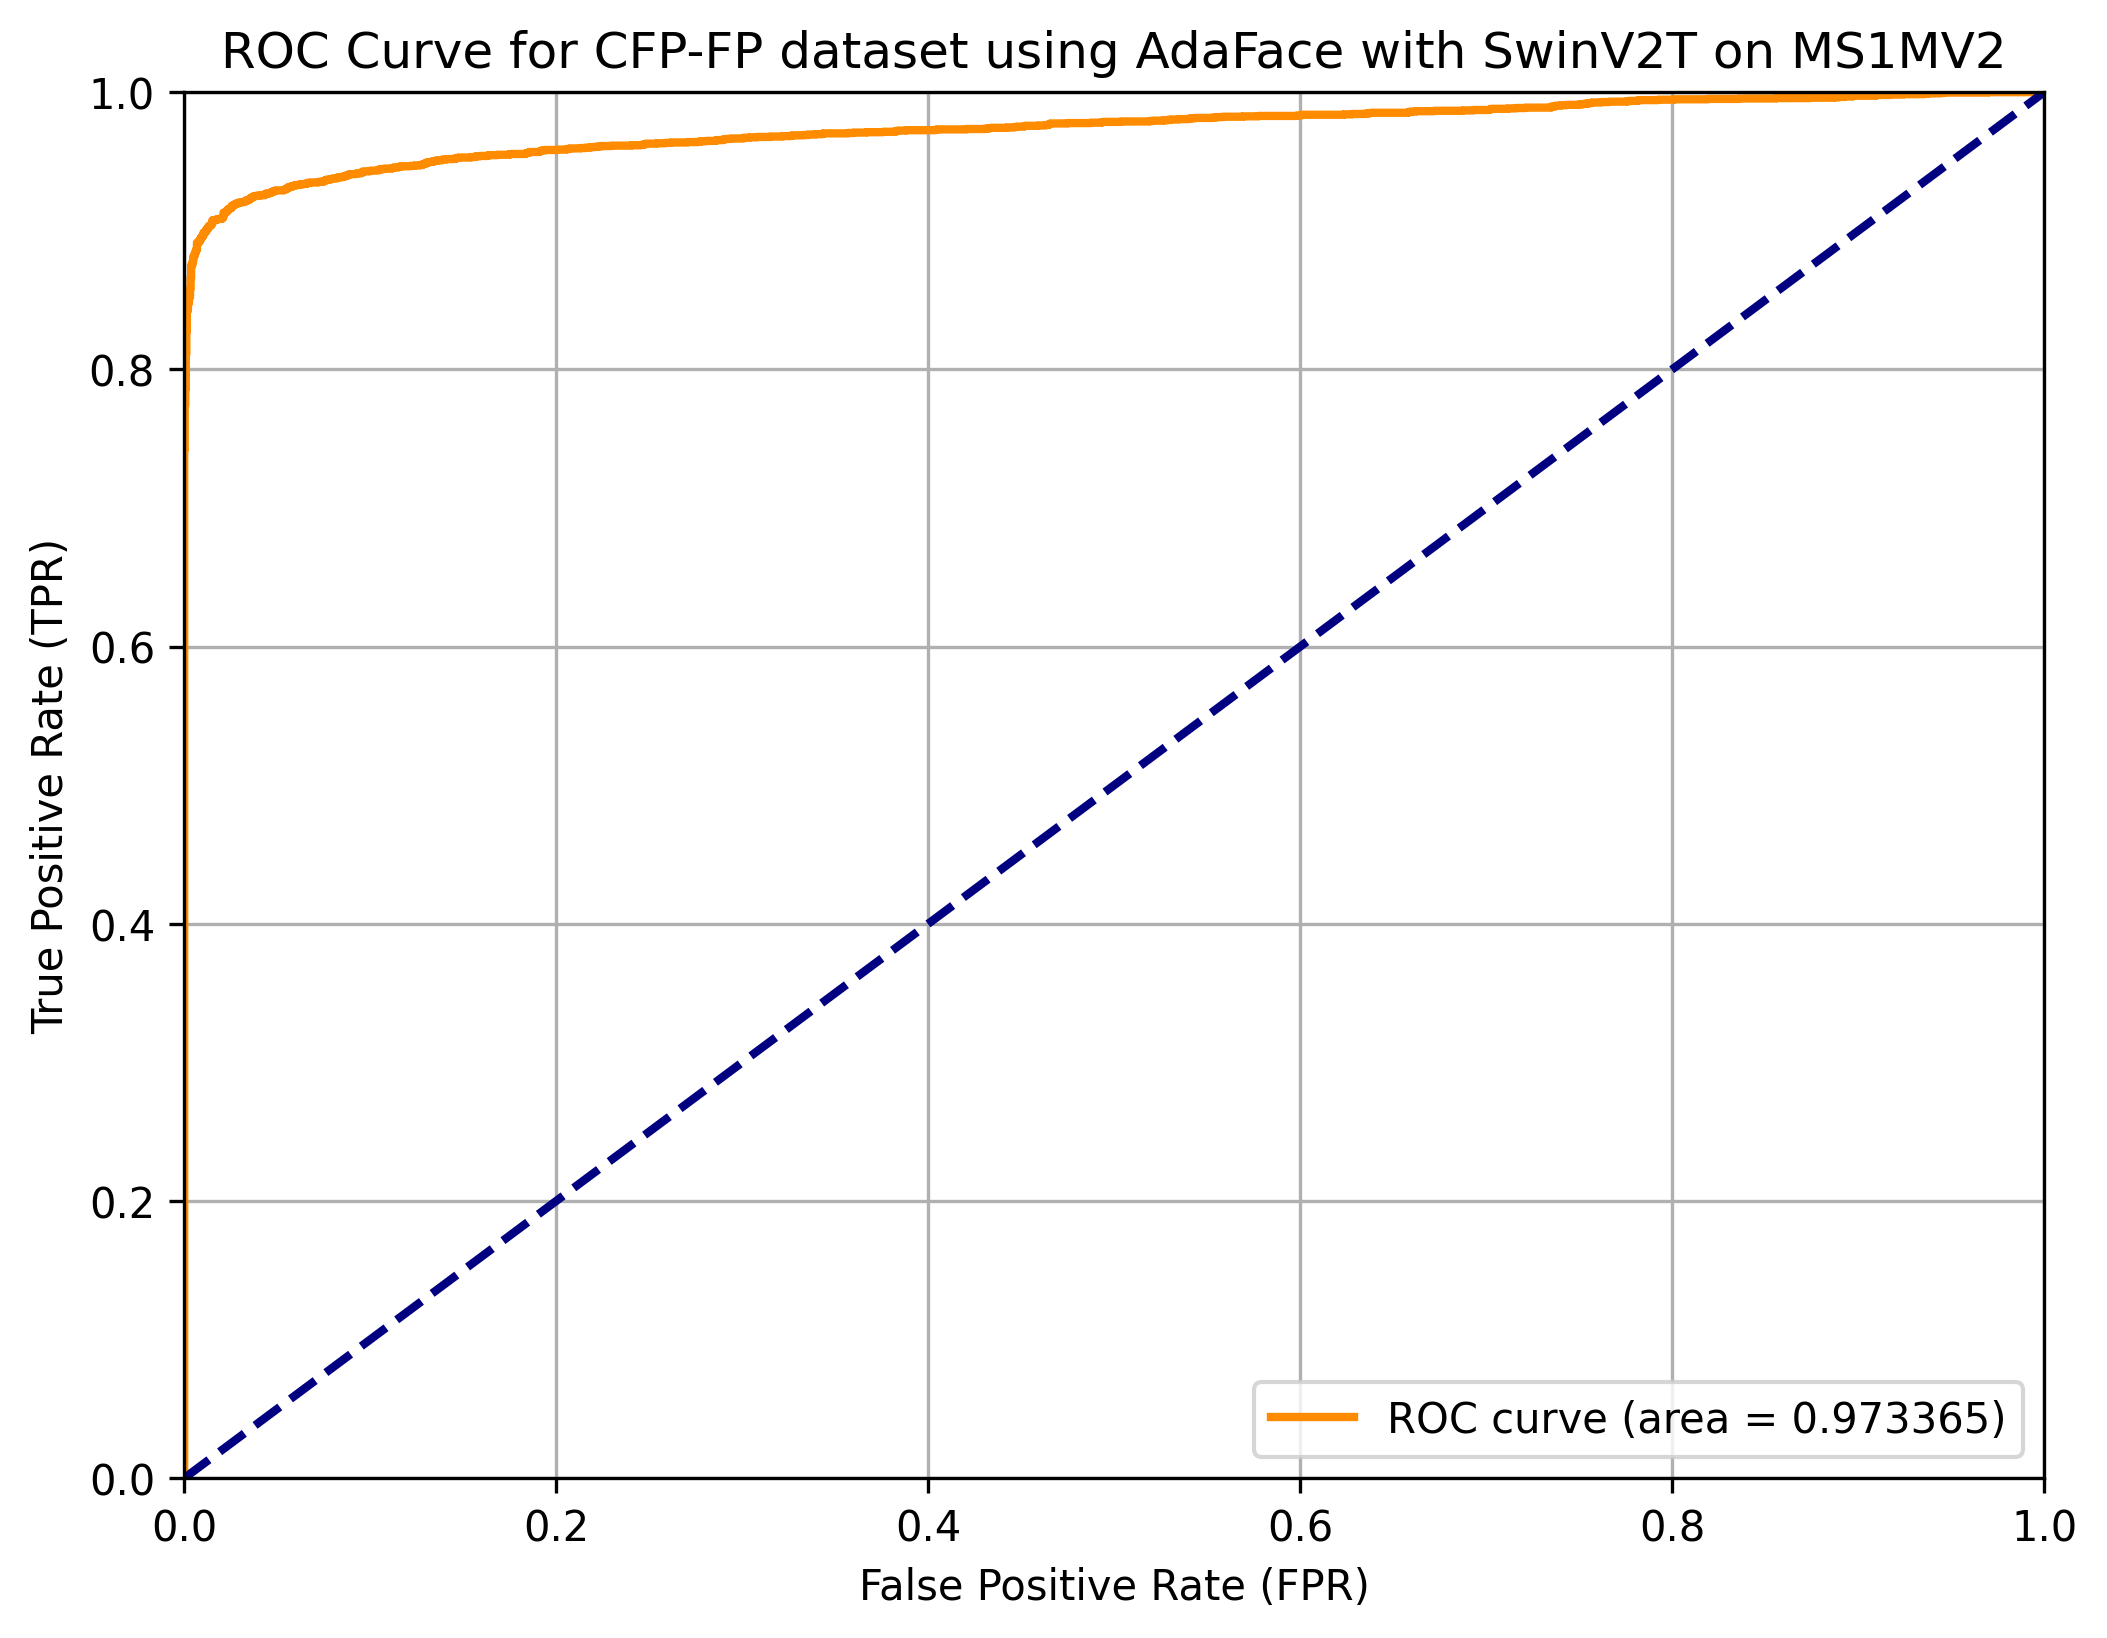

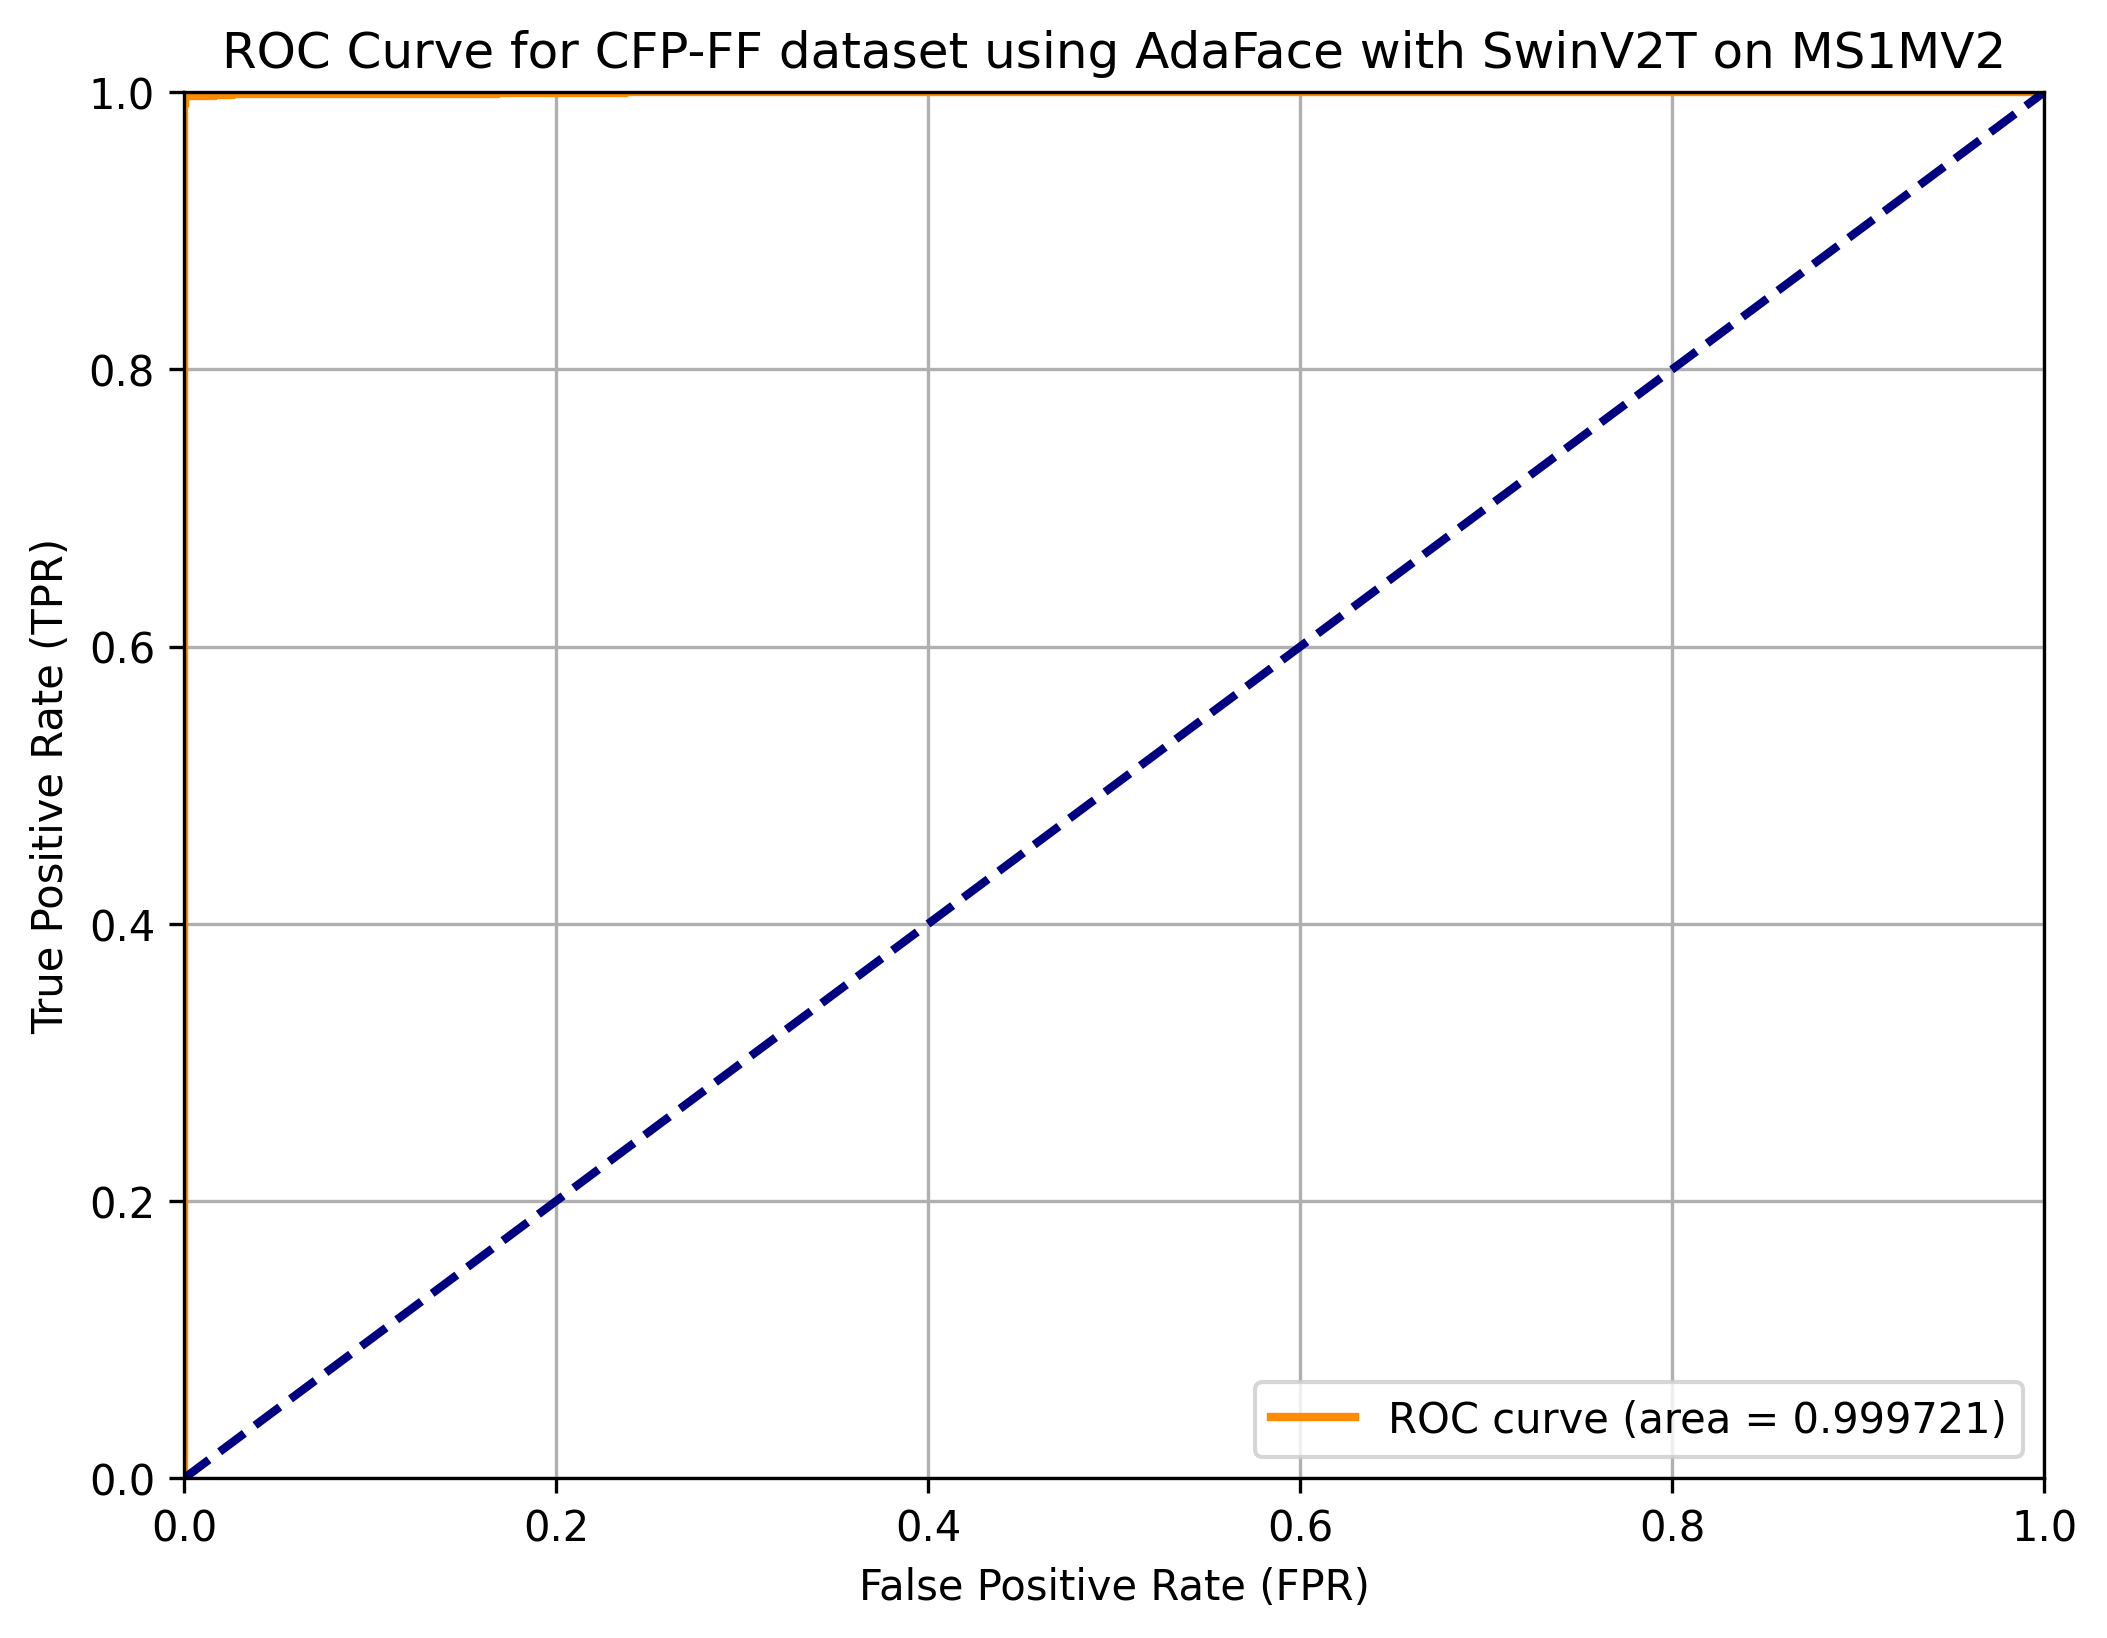

In [ ]:
output_dir = os.path.join('data', 'results', 'AdaFace using MS1MV2 and DaViT')
for key in metrics.keys():
    accuracy, precision, recall, f1_score, auc, fpr, tpr, thresholds = metrics[key]

    print(f'{key} dataset got:')
    print(f'\t{100 * accuracy:.8f} accuracy.')
    print(f'\t{100 * precision:.8f} precision.')
    print(f'\t{100 * recall:.8f} recall.')
    print(f'\t{100 * f1_score:.8f} f1_score.')

    roc_title = f'ROC Curve for {key} dataset using AdaFace with DaViT on MS1MV2'
    with open(os.path.join(output_dir, 'metrics.txt'), 'a') as f:
        f.writelines(f"""
          {key} dataset got:
          \t{100 * accuracy:.8f} accuracy.
          \t{100 * precision:.8f} precision.
          \t{100 * recall:.8f} recall.
          \t{100 * f1_score:.8f} f1_score.
    """)
    plt.figure(figsize = (8, 6), dpi = 300)
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {auc:.6f})')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(roc_title)
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'{roc_title}.png'))


In [17]:
backbone_path = os.path.join('data', 'models', 'davit_t_adaface_MS1MV2_Dataset', 'backbone.pth')
recognition_path = os.path.join('data', 'models', 'davit_t_adaface_MS1MV2_Dataset', 'recognition_subnet.pth')

In [19]:
torch.save(model.backbone.state_dict(), backbone_path)
torch.save(model.recognition_subnet.state_dict(), recognition_path)